# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Demonstrations-of-Single-Player-Simulations-for-Non-Stationary-Bandits" data-toc-modified-id="Demonstrations-of-Single-Player-Simulations-for-Non-Stationary-Bandits-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demonstrations of Single-Player Simulations for Non-Stationary-Bandits</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Two-MAB-problems-with-Bernoulli-arms-and-piecewise-stationary-means" data-toc-modified-id="Two-MAB-problems-with-Bernoulli-arms-and-piecewise-stationary-means-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Two MAB problems with Bernoulli arms and piecewise stationary means</a></div><div class="lev3 toc-item"><a href="#Some-MAB-algorithms" data-toc-modified-id="Some-MAB-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some MAB algorithms</a></div><div class="lev4 toc-item"><a href="#Parameters-of-the-algorithms" data-toc-modified-id="Parameters-of-the-algorithms-1131"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Parameters of the algorithms</a></div><div class="lev4 toc-item"><a href="#Algorithms" data-toc-modified-id="Algorithms-1132"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Algorithms</a></div><div class="lev2 toc-item"><a href="#Checking-if-the-problems-are-too-hard-or-not" data-toc-modified-id="Checking-if-the-problems-are-too-hard-or-not-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking if the problems are too hard or not</a></div><div class="lev2 toc-item"><a href="#Creating-the-Evaluator-object" data-toc-modified-id="Creating-the-Evaluator-object-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating the <code>Evaluator</code> object</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev3 toc-item"><a href="#First-problem" data-toc-modified-id="First-problem-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>First problem</a></div><div class="lev3 toc-item"><a href="#Second-problem" data-toc-modified-id="Second-problem-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Second problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev3 toc-item"><a href="#First-problem-with-change-on-only-one-arm-(Local-Restart-should-be-better)" data-toc-modified-id="First-problem-with-change-on-only-one-arm-(Local-Restart-should-be-better)-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>First problem with change on only one arm (Local Restart should be better)</a></div><div class="lev3 toc-item"><a href="#Second-problem-with-changes-on-all-arms-(Global-restart-should-be-better)" data-toc-modified-id="Second-problem-with-changes-on-all-arms-(Global-restart-should-be-better)-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Second problem with changes on all arms (Global restart should be better)</a></div>

---
# Demonstrations of Single-Player Simulations for Non-Stationary-Bandits

This notebook shows how to 1) **define**, 2) **launch**, and 3) **plot the results** of numerical simulations of piecewise stationary (multi-armed) bandits problems using my framework [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits).
For more details on the maths behind this problem, see this page in the documentation: [SMPyBandits.GitHub.io/NonStationaryBandits.html](https://smpybandits.github.io/NonStationaryBandits.html).

First, be sure to be in the main folder, or to have [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits) installed, and import `Evaluator` from `Environment` package.

<span style="color:red">WARNING</span>
If you are running this notebook locally, in the [`notebooks`](https://github.com/SMPyBandits/SMPyBandits/tree/master/notebooks) folder in the [`SMPyBandits`](https://github.com/SMPyBandits/SMPyBandits/) source, you need to do:

In [1]:
import sys
sys.path.insert(0, '..')

If you are running this notebook elsewhere, `SMPyBandits` can be `pip install`ed easily:
(this is especially true if you run this notebook from Google Colab or MyBinder).

In [2]:
try:
    import SMPyBandits
except ImportError:
    !pip3 install SMPyBandits

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


Let's just check the versions of the installed modules:

In [3]:
!pip3 install watermark > /dev/null

In [4]:
%load_ext watermark
%watermark -v -m -p SMPyBandits,numpy,matplotlib -a "Lilian Besson"

Lilian Besson 

CPython 3.6.7
IPython 7.2.0

SMPyBandits 0.9.4
numpy 1.15.4
matplotlib 3.0.2

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


We can now import all the modules we need for this demonstration.

In [5]:
import numpy as np

In [44]:
FIGSIZE = (19.80, 10.80)
DPI = 160

In [45]:
# Large figures for pretty notebooks
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = FIGSIZE
mpl.rcParams['figure.dpi'] = DPI

In [46]:
# Local imports
from SMPyBandits.Environment import Evaluator, tqdm

In [47]:
# Large figures for pretty notebooks
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = FIGSIZE
mpl.rcParams['figure.dpi'] = DPI

In [48]:
# Large figures for pretty notebooks
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = FIGSIZE
mpl.rcParams['figure.dpi'] = DPI

We also need arms, for instance `Bernoulli`-distributed arm:

In [10]:
# Import arms
from SMPyBandits.Arms import Bernoulli

And finally we need some single-player Reinforcement Learning algorithms:

In [11]:
# Import algorithms
from SMPyBandits.Policies import *

---
## Creating the problem

### Parameters for the simulation
- $T = 2000$ is the time horizon,
- $N = 100$ is the number of repetitions, or 1 to debug the simulations,
- `N_JOBS = 4` is the number of cores used to parallelize the code,
- $5$ piecewise stationary sequences will have length 400

In [49]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()
N_JOBS = CPU_COUNT if CPU_COUNT <= 4 else CPU_COUNT - 4

print("Using {} jobs in parallel...".format(N_JOBS))

Using 4 jobs in parallel...


In [51]:
HORIZON = 2000
REPETITIONS = 50

print("Using T = {}, and N = {} repetitions".format(HORIZON, REPETITIONS))

Using T = 2000, and N = 50 repetitions


### Two MAB problems with Bernoulli arms and piecewise stationary means

We consider in this example $2$ problems, with `Bernoulli` arms, of different piecewise stationary means.

1. The first problem has changes on only one arm at every breakpoint times,
2. The second problem has changes on all arms at every breakpoint times.

In [53]:
ENVIRONMENTS = []

In [54]:
ENVIRONMENT_0 = {   # A simple piece-wise stationary problem
    "arm_type": Bernoulli,
    "params": {
        "listOfMeans": [
            [0.2, 0.5, 0.9],  # 0    to 399
            [0.2, 0.2, 0.9],  # 400  to 799
            [0.2, 0.2, 0.1],  # 800  to 1199
            [0.7, 0.2, 0.1],  # 1200 to 1599
            [0.7, 0.5, 0.1],  # 1600 to end
        ],
        "changePoints": [
            int(0    * HORIZON / 2000.0),
            int(400  * HORIZON / 2000.0),
            int(800  * HORIZON / 2000.0),
            int(1200 * HORIZON / 2000.0),
            int(1600 * HORIZON / 2000.0),
        ],
    }
}

In [55]:
# Pb 2 changes are on all or almost arms at a time
ENVIRONMENT_1 =  {   # A simple piece-wise stationary problem
    "arm_type": Bernoulli,
    "params": {
        "listOfMeans": [
            [0.4, 0.5, 0.9],  # 0    to 399
            [0.5, 0.4, 0.7],  # 400  to 799
            [0.6, 0.3, 0.5],  # 800  to 1199
            [0.7, 0.2, 0.3],  # 1200 to 1599
            [0.8, 0.1, 0.1],  # 1600 to end
        ],
        "changePoints": [
            int(0    * HORIZON / 2000.0),
            int(400  * HORIZON / 2000.0),
            int(800  * HORIZON / 2000.0),
            int(1200 * HORIZON / 2000.0),
            int(1600 * HORIZON / 2000.0),
        ],
    }
}

In [56]:
ENVIRONMENTS = [
    ENVIRONMENT_0,
    ENVIRONMENT_1,
]

list_nb_arms = [len(env["params"]["listOfMeans"][0]) for env in ENVIRONMENTS]
NB_ARMS = max(list_nb_arms)
assert all(n == NB_ARMS for n in list_nb_arms), "Error: it is NOT supported to have successive problems with a different number of arms!"
print("==> Using K = {} arms".format(NB_ARMS))

NB_BREAK_POINTS = max(len(env["params"]["changePoints"]) for env in ENVIRONMENTS)
print("==> Using Upsilon_T = {} change points".format(NB_BREAK_POINTS))

CHANGE_POINTS = np.unique(np.array(list(set.union(*(set(env["params"]["changePoints"]) for env in ENVIRONMENTS)))))
print("==> Using the following {} change points".format(list(CHANGE_POINTS)))

==> Using K = 3 arms
==> Using Upsilon_T = 5 change points
==> Using the following [0, 400, 800, 1200, 1600] change points


### Some MAB algorithms

We want compare some classical MAB algorithms ($\mathrm{UCB}_1$, Thompson Sampling and $\mathrm{kl}$-$\mathrm{UCB}$) that are designed to solve stationary problems against other algorithms designed to solve piecewise-stationary problems.

#### Parameters of the algorithms

In [15]:
klucb = klucb_mapping.get(str(ENVIRONMENTS[0]['arm_type']), klucbBern)
klucb

<function SMPyBandits.Policies.kullback.klucbBern>

In [61]:
WINDOW_SIZE = int(80 * np.ceil(HORIZON / 10000))
print("M-UCB will use a window of size {}".format(WINDOW_SIZE))

M-UCB will use a window of size 80


#### Algorithms

In [62]:
POLICIES = [  # XXX Regular adversarial bandits algorithms!
        { "archtype": Exp3PlusPlus, "params": {} },
    ] + [  # XXX Regular stochastic bandits algorithms!
        { "archtype": UCBalpha, "params": { "alpha": 1, } },
        { "archtype": klUCB, "params": { "klucb": klucb, } },
        { "archtype": Thompson, "params": { "posterior": Beta, } },
    ] + [  # XXX This is still highly experimental!
        { "archtype": DiscountedThompson, "params": {
            "posterior": DiscountedBeta, "gamma": gamma
        } }
        for gamma in [0.99, 0.9, 0.7]
    ] + [  # --- The Exp3R algorithm works reasonably well
        { "archtype": Exp3R, "params": { "horizon": HORIZON, } }
    ] + [  # --- XXX The Exp3RPlusPlus variant of Exp3R algorithm works also reasonably well
        { "archtype": Exp3RPlusPlus, "params": { "horizon": HORIZON, } }
    ] + [  # --- XXX Test a few CD-MAB algorithms that need to know NB_BREAK_POINTS
        { "archtype": archtype, "params": {
            "horizon": HORIZON,
            "max_nb_random_events": NB_BREAK_POINTS,
            "policy": policy,
            "per_arm_restart": per_arm_restart,
        } }
        for archtype in [
            CUSUM_IndexPolicy,
            PHT_IndexPolicy,  # OK PHT_IndexPolicy is very much like CUSUM
        ]
        for policy in [
            # UCB,  # XXX comment to only test klUCB
            klUCB,
        ]
        for per_arm_restart in [
            True,  # Per-arm restart XXX comment to only test global arm
            False, # Global restart XXX seems more efficient? (at least more memory efficient!)
        ]
    ] + [  # --- XXX Test a few CD-MAB algorithms
        { "archtype": archtype, "params": {
            "horizon": HORIZON,
            "policy": policy,
            "per_arm_restart": per_arm_restart,
        } }
        for archtype in [
            BernoulliGLR_IndexPolicy,  # OK BernoulliGLR_IndexPolicy is very much like CUSUM
            GaussianGLR_IndexPolicy,  # OK GaussianGLR_IndexPolicy is very much like Bernoulli GLR
            SubGaussianGLR_IndexPolicy, # OK SubGaussianGLR_IndexPolicy is very much like Gaussian GLR
        ]
        for policy in [
            # UCB,  # XXX comment to only test klUCB
            klUCB,
        ]
        for per_arm_restart in [
            True,  # Per-arm restart XXX comment to only test global arm
            False, # Global restart XXX seems more efficient? (at least more memory efficient!)
        ]
    ] + [  # --- XXX The Monitored_IndexPolicy with specific tuning of the input parameters
        { "archtype": Monitored_IndexPolicy, "params": {
            "horizon": HORIZON,
            "w": WINDOW_SIZE,
            "b": np.sqrt(WINDOW_SIZE/2 * np.log(2 * NB_ARMS * HORIZON**2)),
            "policy": policy,
            "per_arm_restart": per_arm_restart,
        } }
        for policy in [
            # UCB,
            klUCB,  # XXX comment to only test UCB
        ]
        for per_arm_restart in [
            True,  # Per-arm restart XXX comment to only test global arm
            False, # Global restart XXX seems more efficient? (at least more memory efficient!)
        ]
    ] + [  # --- DONE The SW_UCB_Hash algorithm works fine!
        { "archtype": SWHash_IndexPolicy, "params": {
            "alpha": alpha, "lmbda": lmbda, "policy": UCB,
        } }
        for alpha in [1.0]
        for lmbda in [1]
    ] + [ # --- # XXX experimental other version of the sliding window algorithm, knowing the horizon
        { "archtype": SWUCBPlus, "params": {
            "horizon": HORIZON, "alpha": alpha,
        } }
        for alpha in [1.0]
    ] + [ # --- # XXX experimental discounted UCB algorithm, knowing the horizon
        { "archtype": DiscountedUCBPlus, "params": {
            "max_nb_random_events": max_nb_random_events, "alpha": alpha, "horizon": HORIZON,
        } }
        for alpha in [1.0]
        for max_nb_random_events in [NB_BREAK_POINTS]
    ] + [  # --- DONE the OracleSequentiallyRestartPolicy with klUCB/UCB policy works quite well, but NOT optimally!
        { "archtype": OracleSequentiallyRestartPolicy, "params": {
            "changePoints": CHANGE_POINTS, "policy": policy,
            "per_arm_restart": per_arm_restart,
            # "full_restart_when_refresh": full_restart_when_refresh,
        } }
        for policy in [
            UCB,
            klUCB,  # XXX comment to only test UCB
            Exp3PlusPlus,  # XXX comment to only test UCB
        ]
        for per_arm_restart in [True]  #, False]
        # for full_restart_when_refresh in [True, False]
    ]

The complete configuration for the problems and these algorithms is then a simple dictionary:

In [64]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 0,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
    # --- Random events
    "nb_break_points": NB_BREAK_POINTS,
    # --- Should we plot the lower-bounds or not?
    "plot_lowerbound": False,  # XXX Default
}

configuration

{'horizon': 2000,
 'repetitions': 50,
 'n_jobs': 4,
 'verbosity': 0,
 'environment': [{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': {'listOfMeans': [[0.2, 0.5, 0.9],
     [0.2, 0.2, 0.9],
     [0.2, 0.2, 0.1],
     [0.7, 0.2, 0.1],
     [0.7, 0.5, 0.1]],
    'changePoints': [0, 400, 800, 1200, 1600]}},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': {'listOfMeans': [[0.4, 0.5, 0.9],
     [0.5, 0.4, 0.7],
     [0.6, 0.3, 0.5],
     [0.7, 0.2, 0.3],
     [0.8, 0.1, 0.1]],
    'changePoints': [0, 400, 800, 1200, 1600]}}],
 'policies': [{'archtype': SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus,
   'params': {}},
  {'archtype': SMPyBandits.Policies.UCBalpha.UCBalpha, 'params': {'alpha': 1}},
  {'archtype': SMPyBandits.Policies.klUCB.klUCB,
   'params': {'klucb': <function SMPyBandits.Policies.kullback.klucbBern>}},
  {'archtype': SMPyBandits.Policies.Thompson.Thompson,
   'params': {'posterior': SMPyBandits.Policies.Posterior.Beta.Beta}},
  {'archtype':

In [65]:
# (almost) unique hash from the configuration
hashvalue = abs(hash((tuple(configuration.keys()), tuple([(len(k) if isinstance(k, (dict, tuple, list)) else k) for k in configuration.values()]))))
print("This configuration has a hash value = {}".format(hashvalue))

This configuration has a hash value = 427944937445357777


In [66]:
import os, os.path

In [67]:
subfolder = "SP__K{}_T{}_N{}__{}_algos".format(NB_ARMS, HORIZON, REPETITIONS, len(POLICIES))
PLOT_DIR = "plots"
plot_dir = os.path.join(PLOT_DIR, subfolder)

# Create the sub folder
if os.path.isdir(plot_dir):
    print("{} is already a directory here...".format(plot_dir))
elif os.path.isfile(plot_dir):
    raise ValueError("[ERROR] {} is a file, cannot use it as a directory !".format(plot_dir))
else:
    os.mkdir(plot_dir)

print("Using sub folder = '{}' and plotting in '{}'...".format(subfolder, plot_dir))

Using sub folder = 'SP__K3_T2000_N50__27_algos' and plotting in 'plots/SP__K3_T2000_N50__27_algos'...


In [68]:
mainfig = os.path.join(plot_dir, "main")
print("Using main figure name as '{}_{}'...".format(mainfig, hashvalue))

Using main figure name as 'plots/SP__K3_T2000_N50__27_algos/main_427944937445357777'...


---
## Checking if the problems are too hard or not

If we assume we have a result that bounds the delay of the Change-Detection algorithm by a certain quantity $D$, we can check that the sequence lengths (ie, $\tau_{m+1}-\tau_m$) are *large* enough for the CD-klUCB algorithm (our proposal) to be efficient.

In [69]:
def lowerbound_on_sequence_length(horizon, gap):
    r""" A function that computes the lower-bound (we will find) on the sequence length to have a reasonable bound on the delay of our change-detection algorithm.

    - It returns the smallest possible sequence length :math:`L = \tau_{m+1} - \tau_m` satisfying:

    .. math:: L \geq \frac{8}{\Delta^2} \log(T).
    """
    if np.isclose(gap, 0): return 0
    condition = lambda length: length >= (8/gap**2) * np.log(horizon)
    length = 1
    while not condition(length):
        length += 1
    return length

In [70]:
def check_condition_on_piecewise_stationary_problems(horizon, listOfMeans, changePoints):
    """ Check some conditions on the piecewise stationary problem."""
    M = len(listOfMeans)
    print("For a piecewise stationary problem with M = {} sequences...".format(M))  # DEBUG
    for m in range(M - 1):
        mus_m = listOfMeans[m]
        tau_m = changePoints[m]
        mus_mp1 = listOfMeans[m+1]
        tau_mp1 = changePoints[m+1]
        print("\nChecking m-th (m = {}) sequence, µ_m = {}, µ_m+1 = {} and tau_m = {} and tau_m+1 = {}".format(m, mus_m, mus_mp1, tau_m, tau_mp1))  # DEBUG
        for i, (mu_i_m, mu_i_mp1) in enumerate(zip(mus_m, mus_mp1)):
            gap = abs(mu_i_m - mu_i_mp1)
            length = tau_mp1 - tau_m
            lowerbound = lowerbound_on_sequence_length(horizon, gap)
            print("   - For arm i = {}, gap = {:.3g} and length = {} with lowerbound on length = {}...".format(i, gap, length, lowerbound))  # DEBUG
            if length < lowerbound:
                print("WARNING For arm i = {}, gap = {:.3g} and length = {} < lowerbound on length = {} !!".format(i, gap, length, lowerbound))  # DEBUG

In [71]:
for envId, env in enumerate(configuration["environment"]):
    print("\n\n\nChecking environment number {}".format(envId))  # DEBUG
    listOfMeans = env["params"]["listOfMeans"]
    changePoints = env["params"]["changePoints"]
    check_condition_on_piecewise_stationary_problems(HORIZON, listOfMeans, changePoints)




Checking environment number 0
For a piecewise stationary problem with M = 5 sequences...

Checking m-th (m = 0) sequence, µ_m = [0.2, 0.5, 0.9], µ_m+1 = [0.2, 0.2, 0.9] and tau_m = 0 and tau_m+1 = 400
   - For arm i = 0, gap = 0 and length = 400 with lowerbound on length = 0...
   - For arm i = 1, gap = 0.3 and length = 400 with lowerbound on length = 676...
WARNING For arm i = 1, gap = 0.3 and length = 400 < lowerbound on length = 676 !!
   - For arm i = 2, gap = 0 and length = 400 with lowerbound on length = 0...

Checking m-th (m = 1) sequence, µ_m = [0.2, 0.2, 0.9], µ_m+1 = [0.2, 0.2, 0.1] and tau_m = 400 and tau_m+1 = 800
   - For arm i = 0, gap = 0 and length = 400 with lowerbound on length = 0...
   - For arm i = 1, gap = 0 and length = 400 with lowerbound on length = 0...
   - For arm i = 2, gap = 0.8 and length = 400 with lowerbound on length = 96...

Checking m-th (m = 2) sequence, µ_m = [0.2, 0.2, 0.1], µ_m+1 = [0.7, 0.2, 0.1] and tau_m = 800 and tau_m+1 = 1200
   - For a

We checked that the two problems are not "easy enough" for our approach to be provably efficient.

---
## Creating the `Evaluator` object

In [72]:
evaluation = Evaluator(configuration)

Number of policies in this comparison: 27
Time horizon: 2000
Number of repetitions: 50
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 4
Using this dictionary to create a new environment:
 {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': {'listOfMeans': [[0.2, 0.5, 0.9], [0.2, 0.2, 0.9], [0.2, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 400, 800, 1200, 1600]}}
  Special MAB problem, with arm (possibly) changing at every time step, read from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': {'listOfMeans': [[0.2, 0.5, 0.9], [0.2, 0.2, 0.9], [0.2, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 400, 800, 1200, 1600]}} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = {'listOfMeans': [[0.2, 0.5, 0.9], [0.2, 0.2, 0.9], [0.2, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 400, 800, 1200,

In [73]:
def printAll(evaluation, envId):
    print("\nGiving the vector of final regrets ...")
    evaluation.printLastRegrets(envId)
    print("\nGiving the final ranks ...")
    evaluation.printFinalRanking(envId)
    print("\nGiving the mean and std running times ...")
    evaluation.printRunningTimes(envId)
    print("\nGiving the mean and std memory consumption ...")
    evaluation.printMemoryConsumption(envId)

##  Solving the problem
Now we can simulate all the environments.

<span style="color:red">WARNING</span>
That part takes some time, most stationary algorithms run with a time complexity linear in the horizon (ie., time takes $\mathcal{O}(T)$) and most piecewise stationary algorithms run with a time complexity **square** in the horizon (ie., time takes $\mathcal{O}(T^2)$).

### First problem

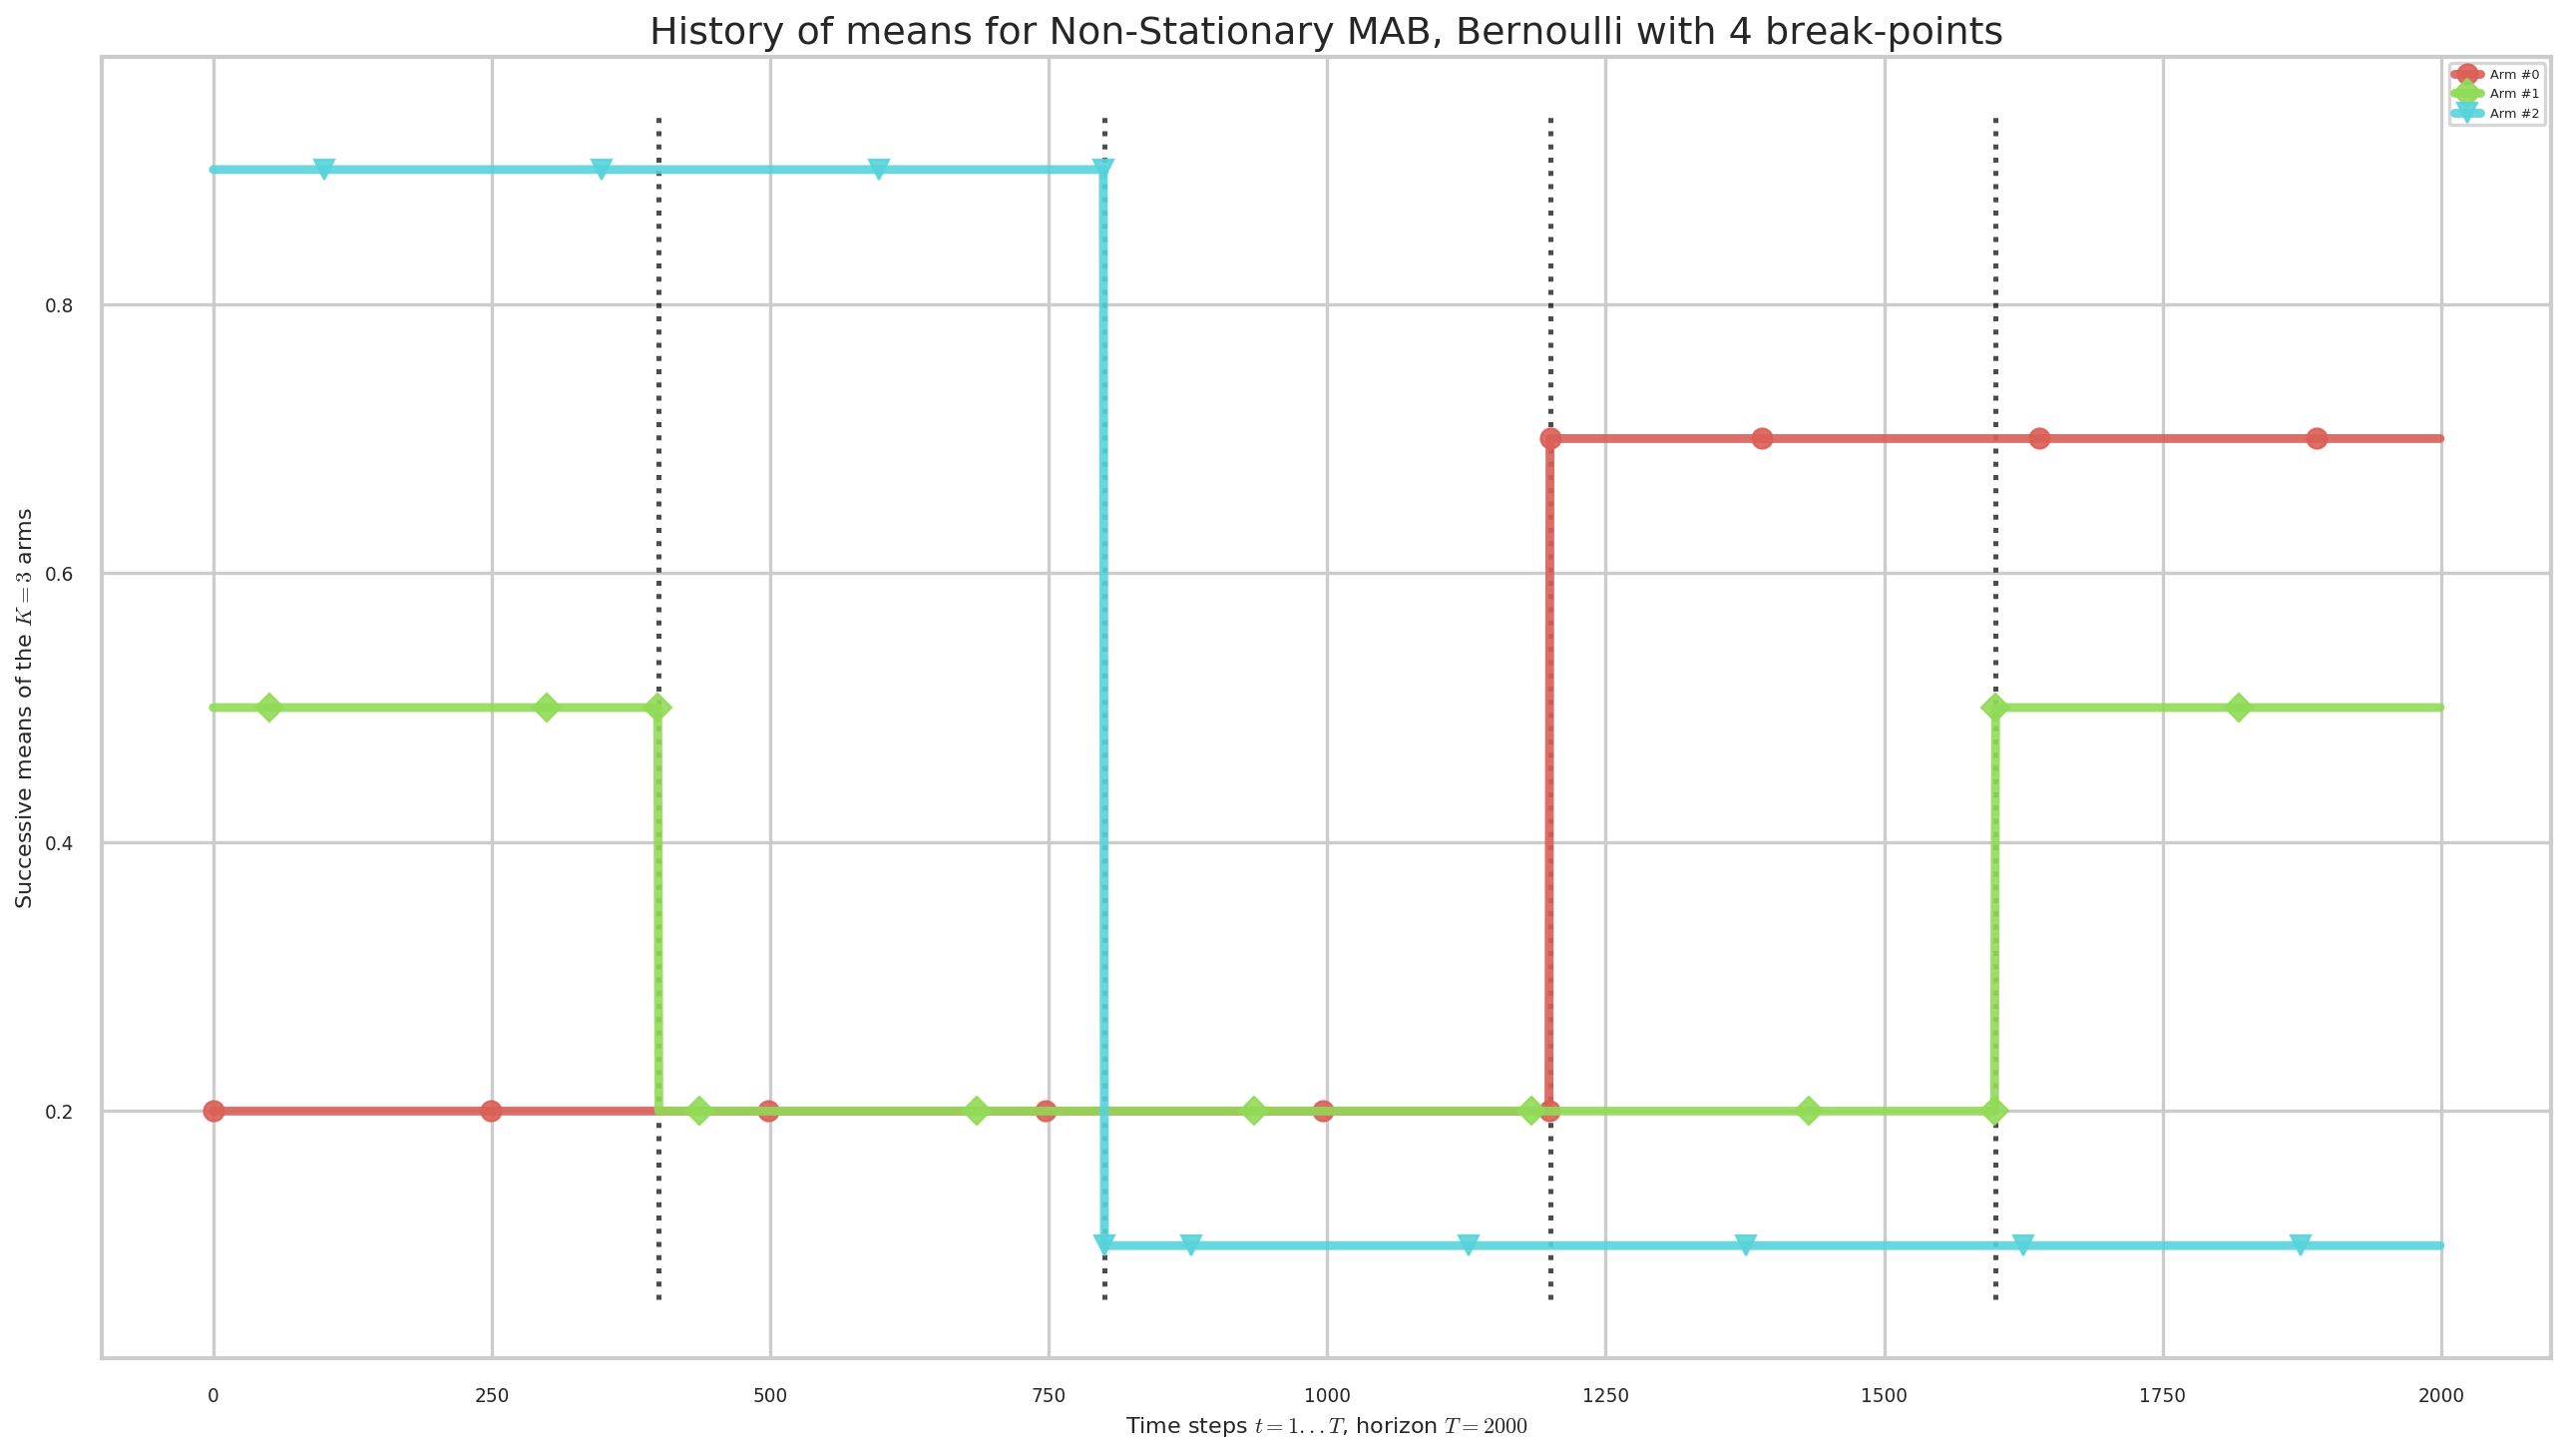

CPU times: user 1.55 s, sys: 301 ms, total: 1.85 s
Wall time: 1.43 s


In [74]:
%%time
envId = 0
env = evaluation.envs[envId]
# Show the problem
evaluation.plotHistoryOfMeans(envId)

In [75]:
%%time
# Evaluate just that env
evaluation.startOneEnv(envId, env)



Evaluating environment: PieceWiseStationaryMAB(nbArms: 3, arms: [B(0.2), B(0.5), B(0.9)])
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
- Adding policy #3 = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
- Adding policy #4 = {'archtype': <class 'SMPyBan





- Evaluating policy #2/27: UCB($\alpha=1$) ...






- Evaluating policy #3/27: kl-UCB ...






- Evaluating policy #4/27: Thompson ...






- Evaluating policy #5/27: DiscountedThompson($\gamma=0.99$) ...






- Evaluating policy #6/27: DiscountedThompson($\gamma=0.9$) ...






- Evaluating policy #7/27: DiscountedThompson($\gamma=0.7$) ...






- Evaluating policy #8/27: Exp3R($T=2000$, $c=4.02$, $\alpha=0.01$) ...






- Evaluating policy #9/27: Exp3R++($T=2000$, $c=0.73$, $\alpha=0.303$) ...






- Evaluating policy #10/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...






- Evaluating policy #11/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...






- Evaluating policy #12/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...






- Evaluating policy #13/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...






- Evaluating policy #14/27: BernoulliGLR-klUCB(Per-Arm) ...






- Evaluating policy #15/27: BernoulliGLR-klUCB(Global) ...






- Evaluating policy #16/27: GaussianGLR-klUCB(Per-Arm) ...






- Evaluating policy #17/27: GaussianGLR-klUCB(Global) ...






- Evaluating policy #18/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Per-Arm) ...






- Evaluating policy #19/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Global) ...






- Evaluating policy #20/27: M-klUCB($w=80$, $b=26.0719$, $\gamma=0.00662$, Per-Arm) ...






- Evaluating policy #21/27: M-klUCB($w=80$, $b=26.0719$, $\gamma=0.00662$, Global) ...






- Evaluating policy #22/27: SW-UCB#($\lambda=1$, $\alpha=1$) ...






- Evaluating policy #23/27: SW-UCB+($\tau=493$, $\alpha=1$) ...






- Evaluating policy #24/27: D-UCB+($\alpha=1$, $\gamma=0.9875$) ...






- Evaluating policy #25/27: OracleRestart-UCB($\Upsilon_T=4$, Per-Arm) ...






- Evaluating policy #26/27: OracleRestart-klUCB($\Upsilon_T=4$, Per-Arm) ...






- Evaluating policy #27/27: OracleRestart-Exp3PlusPlus($\Upsilon_T=4$, Per-Arm) ...



CPU times: user 16.6 s, sys: 403 ms, total: 17 s
Wall time: 22min 52s


In [76]:
_ = printAll(evaluation, envId)


Giving the vector of final regrets ...

  For policy #0 called 'Exp3++' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 476
Mean of   last regrets R_T = 476
Median of last regrets R_T = 476
Max of    last regrets R_T = 476
STD of    last regrets R_T = 5.68e-14

  For policy #1 called 'UCB($\alpha=1$)' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 87.5
Mean of   last regrets R_T = 87.5
Median of last regrets R_T = 87.5
Max of    last regrets R_T = 87.5
STD of    last regrets R_T = 1.42e-14

  For policy #2 called 'kl-UCB' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 92.6
Mean of   last regrets R_T = 92.6
Median of last regrets R_T = 92.6
Max of    last regrets R_T = 92.6
STD of    last regrets R_T = 1.42e-14

  For policy #3 called 'Thompson' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 215
Mean of   last regrets R_T = 215
Median of last regrets R_T = 215
Max of    la

### Second problem

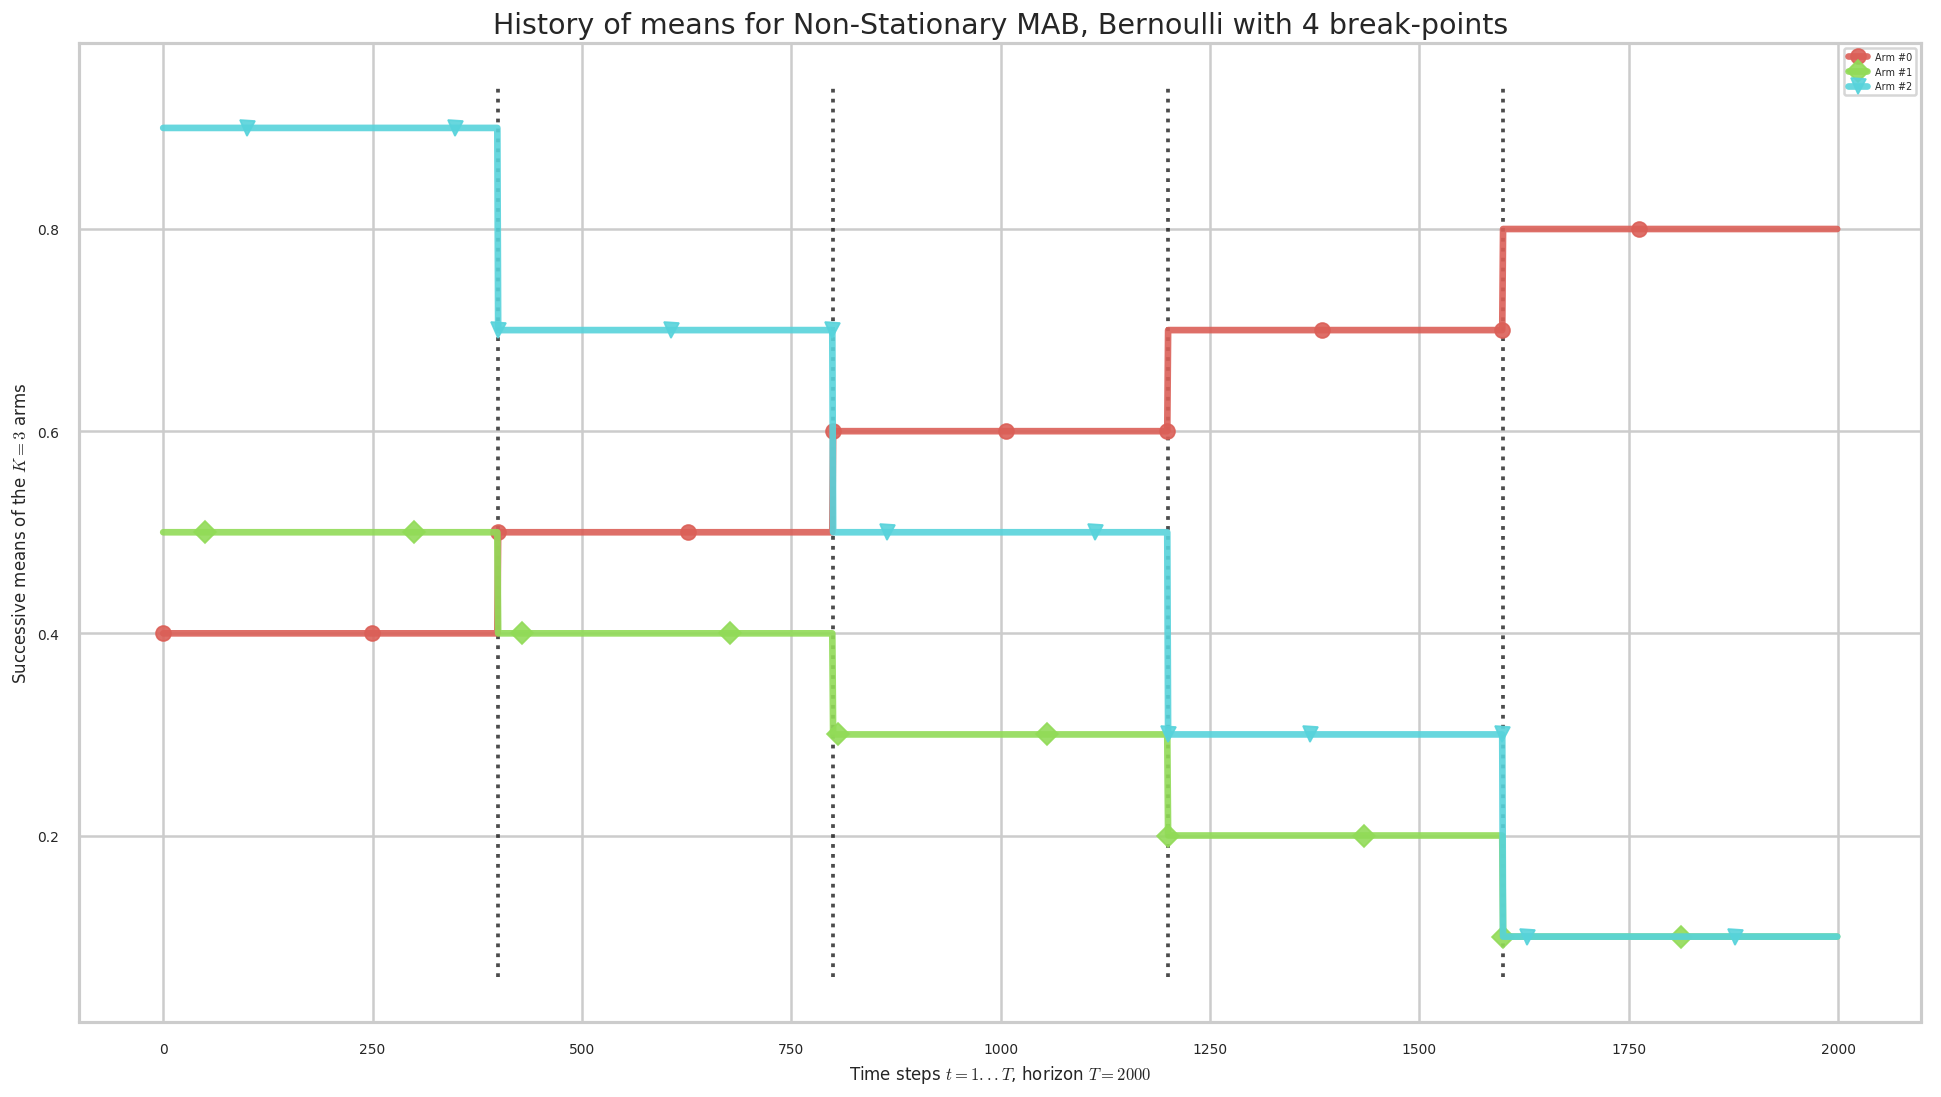

CPU times: user 1.05 s, sys: 368 ms, total: 1.42 s
Wall time: 959 ms


In [33]:
%%time
envId = 1
env = evaluation.envs[envId]
# Show the problem
evaluation.plotHistoryOfMeans(envId)

In [34]:
%%time
# Evaluate just that env
evaluation.startOneEnv(envId, env)



Evaluating environment: PieceWiseStationaryMAB(nbArms: 3, arms: [B(0.4), B(0.5), B(0.9)])
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
- Adding policy #3 = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
- Adding policy #4 = {'archtype': <class 'SMPyBan

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #2/27: UCB($\alpha=1$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.9s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #3/27: kl-UCB ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #4/27: Thompson ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #5/27: DiscountedThompson($\gamma=0.99$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #6/27: DiscountedThompson($\gamma=0.9$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #7/27: DiscountedThompson($\gamma=0.7$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #8/27: Exp3R($T=2000$, $c=4.02$, $\alpha=0.01$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #9/27: Exp3R++($T=2000$, $c=0.73$, $\alpha=0.303$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #10/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    4.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #11/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   12.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   12.9s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #12/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   13.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #13/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #14/27: BernoulliGLR-klUCB(Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    6.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #15/27: BernoulliGLR-klUCB(Global) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   57.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   57.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #16/27: GaussianGLR-klUCB(Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   49.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   49.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #17/27: GaussianGLR-klUCB(Global) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.1min finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #18/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   57.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   57.7s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #19/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Global) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   11.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #20/27: M-klUCB($w=80$, $b=26.0719$, $\gamma=0.00662$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    8.7s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #21/27: M-klUCB($w=80$, $b=26.0719$, $\gamma=0.00662$, Global) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #22/27: SW-UCB#($\lambda=1$, $\alpha=1$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #23/27: SW-UCB+($\tau=493$, $\alpha=1$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #24/27: D-UCB+($\alpha=1$, $\gamma=0.9875$) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #25/27: OracleRestart-UCB($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #26/27: OracleRestart-klUCB($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.






- Evaluating policy #27/27: OracleRestart-Exp3PlusPlus($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



CPU times: user 1.3 s, sys: 116 ms, total: 1.42 s
Wall time: 5min 17s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.4s finished


## Plotting the results
And finally, visualize them, with the plotting method of a `Evaluator` object:

In [82]:
def plotAll(evaluation, envId, mainfig=None):
    savefig = mainfig
    if savefig is not None: savefig = "{}__LastRegrets__env{}-{}".format(mainfig, envId+1, len(evaluation.envs))
    print("\nPlotting a boxplot of the final regrets ...")
    evaluation.plotLastRegrets(envId, boxplot=True, savefig=savefig)

    if savefig is not None: savefig = "{}__RunningTimes__env{}-{}".format(mainfig, envId+1, len(evaluation.envs))
    print("\nPlotting the mean and std running times ...")
    evaluation.plotRunningTimes(envId, savefig=savefig)

    if savefig is not None: savefig = "{}__MemoryConsumption__env{}-{}".format(mainfig, envId+1, len(evaluation.envs))
    print("\nPlotting the mean and std memory consumption ...")
    evaluation.plotMemoryConsumption(envId, savefig=savefig)

    if savefig is not None: savefig = "{}__Regrets__env{}-{}".format(mainfig, envId+1, len(evaluation.envs))
    print("\nPlotting the mean regrets ...")
    evaluation.plotRegrets(envId, savefig=savefig)

    if savefig is not None: savefig = "{}__MeanReward__env{}-{}".format(mainfig, envId+1, len(evaluation.envs))
    print("\nPlotting the mean rewards ...")
    evaluation.plotRegrets(envId, meanReward=True, savefig=savefig)

    if savefig is not None: savefig = "{}__LastRegrets__env{}-{}".format(mainfig, envId+1, len(evaluation.envs))
    print("\nPlotting an histogram of the final regrets ...")
    evaluation.plotLastRegrets(envId, subplots=True, sharex=True, sharey=False, savefig=savefig)

In [83]:
evaluation.nb_break_points

5

### First problem with change on only one arm (Local Restart should be better)

Let's first print the results then plot them:

In [79]:
envId = 0

Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__HistoryOfMeans__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__HistoryOfMeans__env1-2.png' created of size '107560b', at 'Wed Dec 19 17:46:13 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__HistoryOfMeans__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__HistoryOfMeans__env1-2.pdf' created of size '24239b', at 'Wed Dec 19 17:46:14 2018' ...


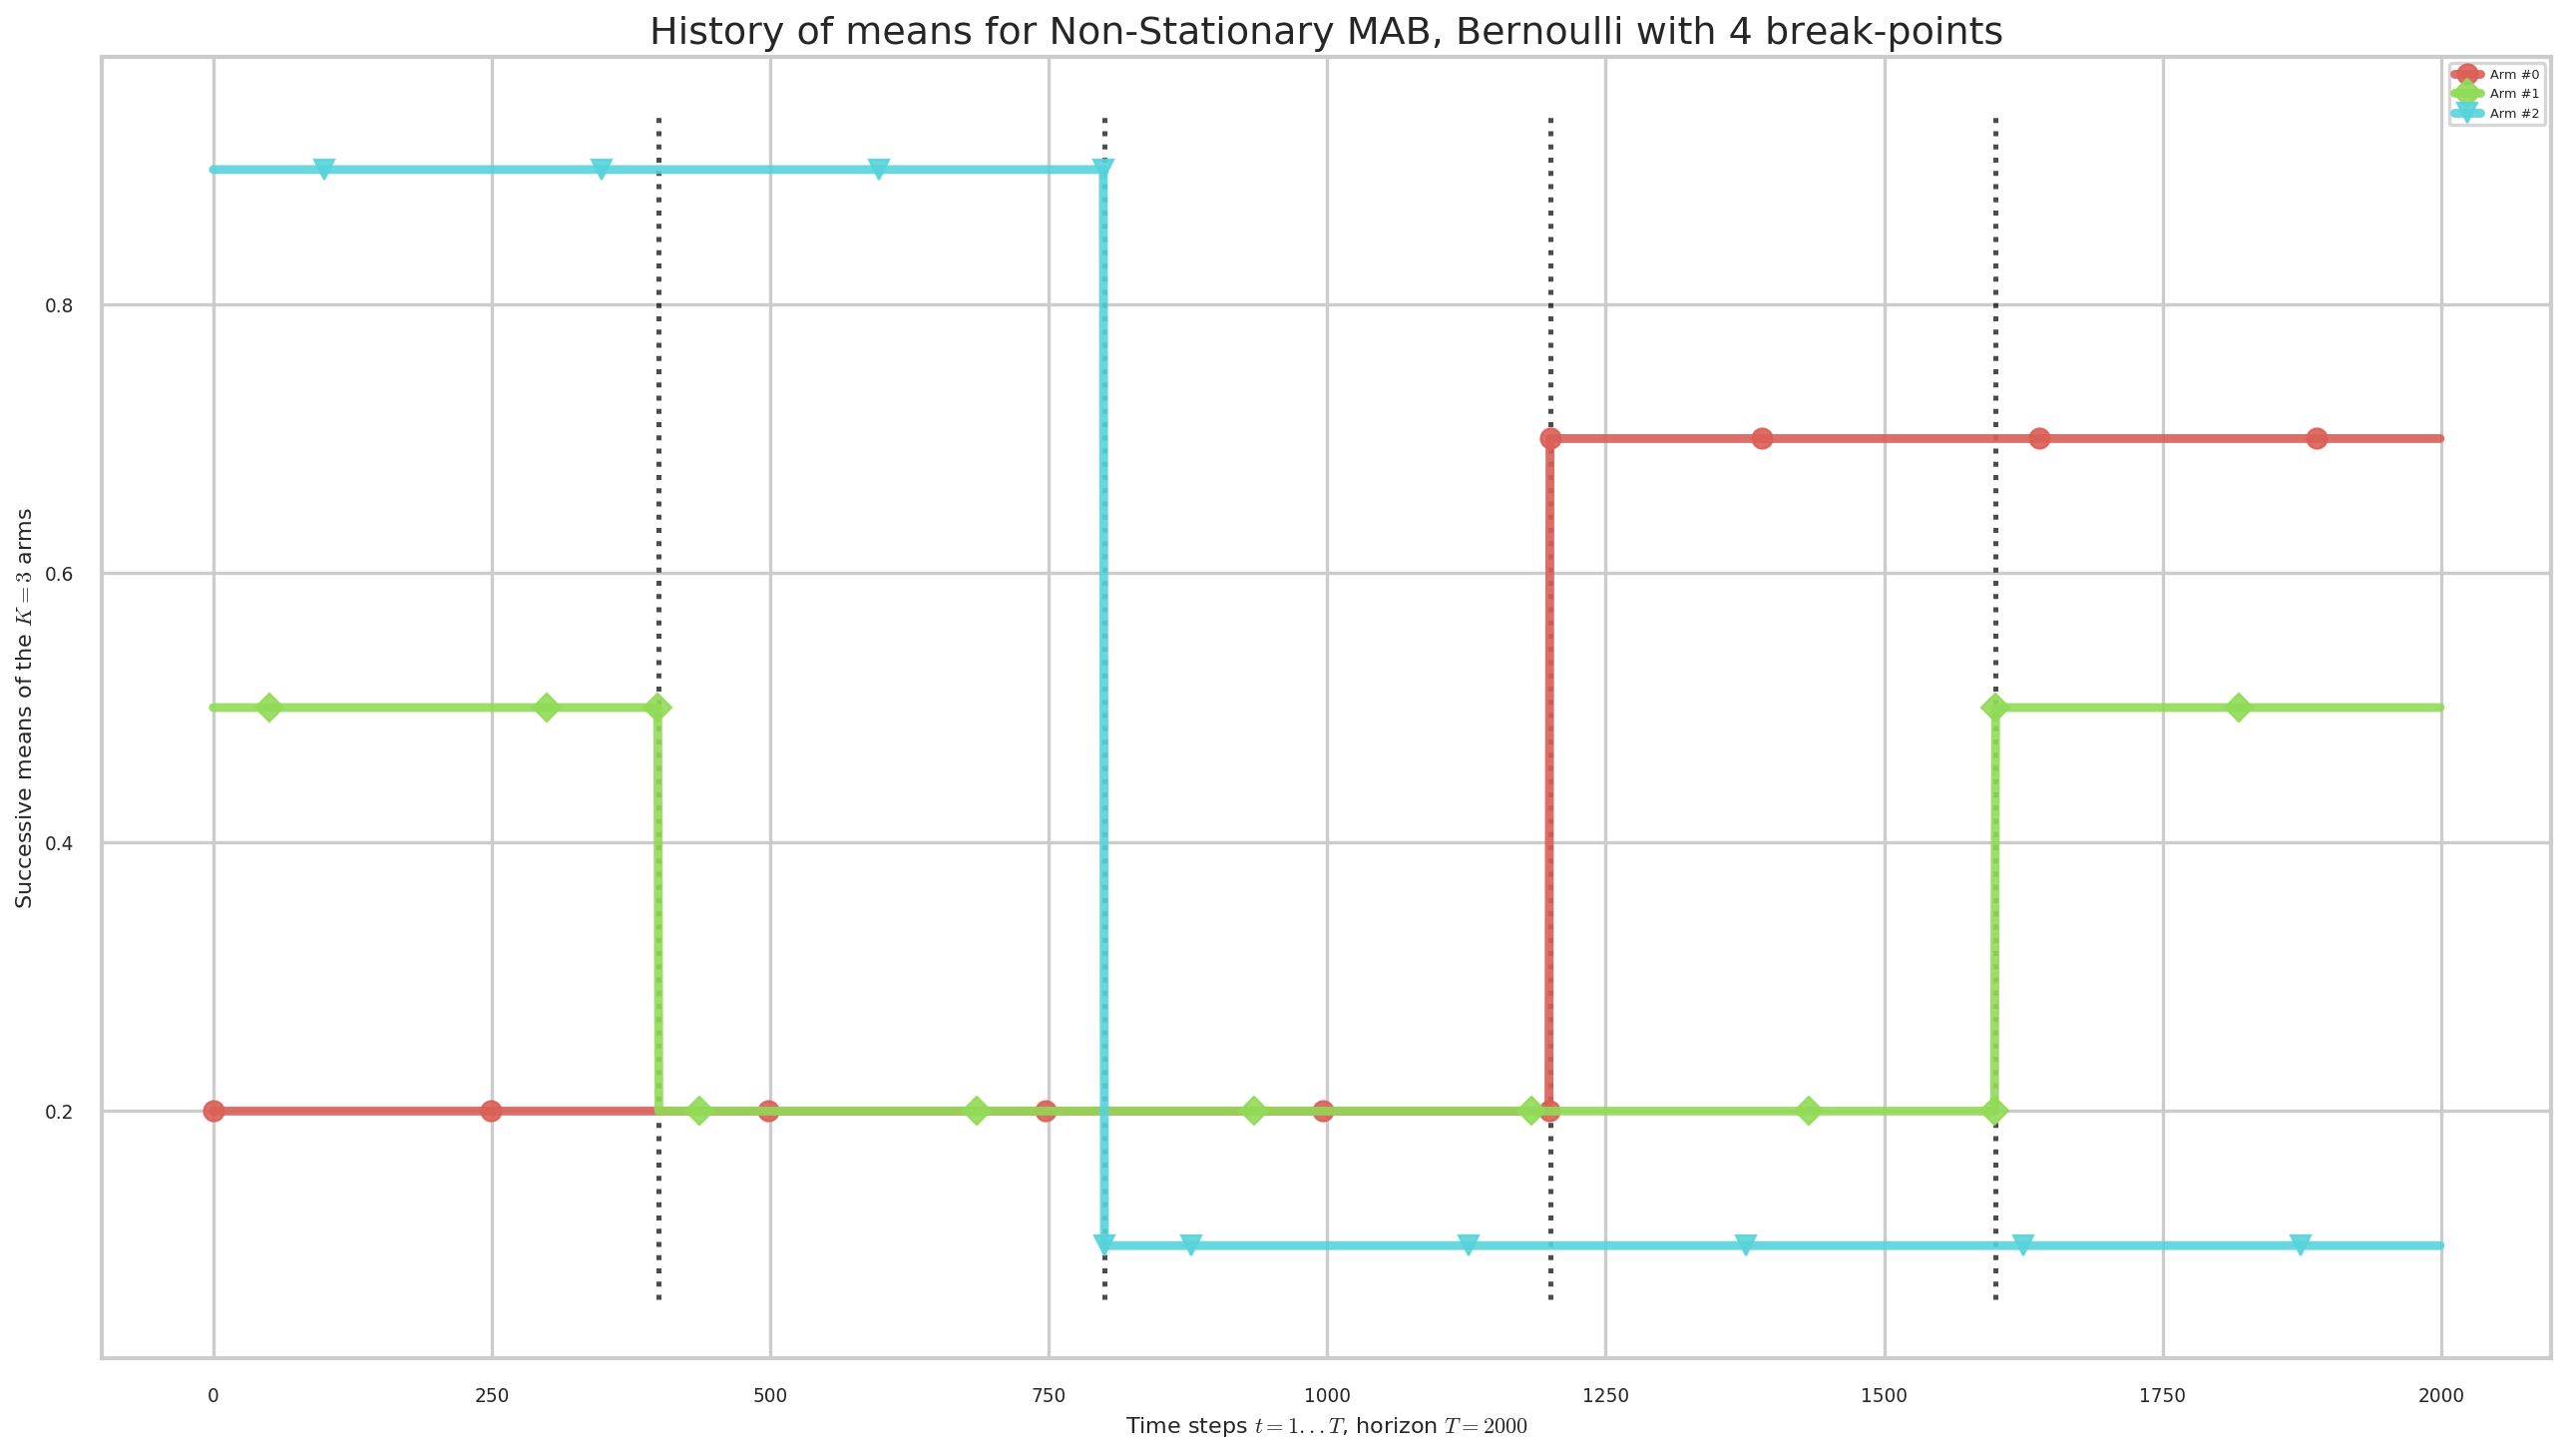

In [80]:
_ = evaluation.plotHistoryOfMeans(envId, savefig="{}__HistoryOfMeans__env{}-{}".format(mainfig, envId+1, len(evaluation.envs)))


Plotting a boxplot of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.png' created of size '273865b', at 'Wed Dec 19 17:46:17 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.pdf' created of size '50192b', at 'Wed Dec 19 17:46:18 2018' ...


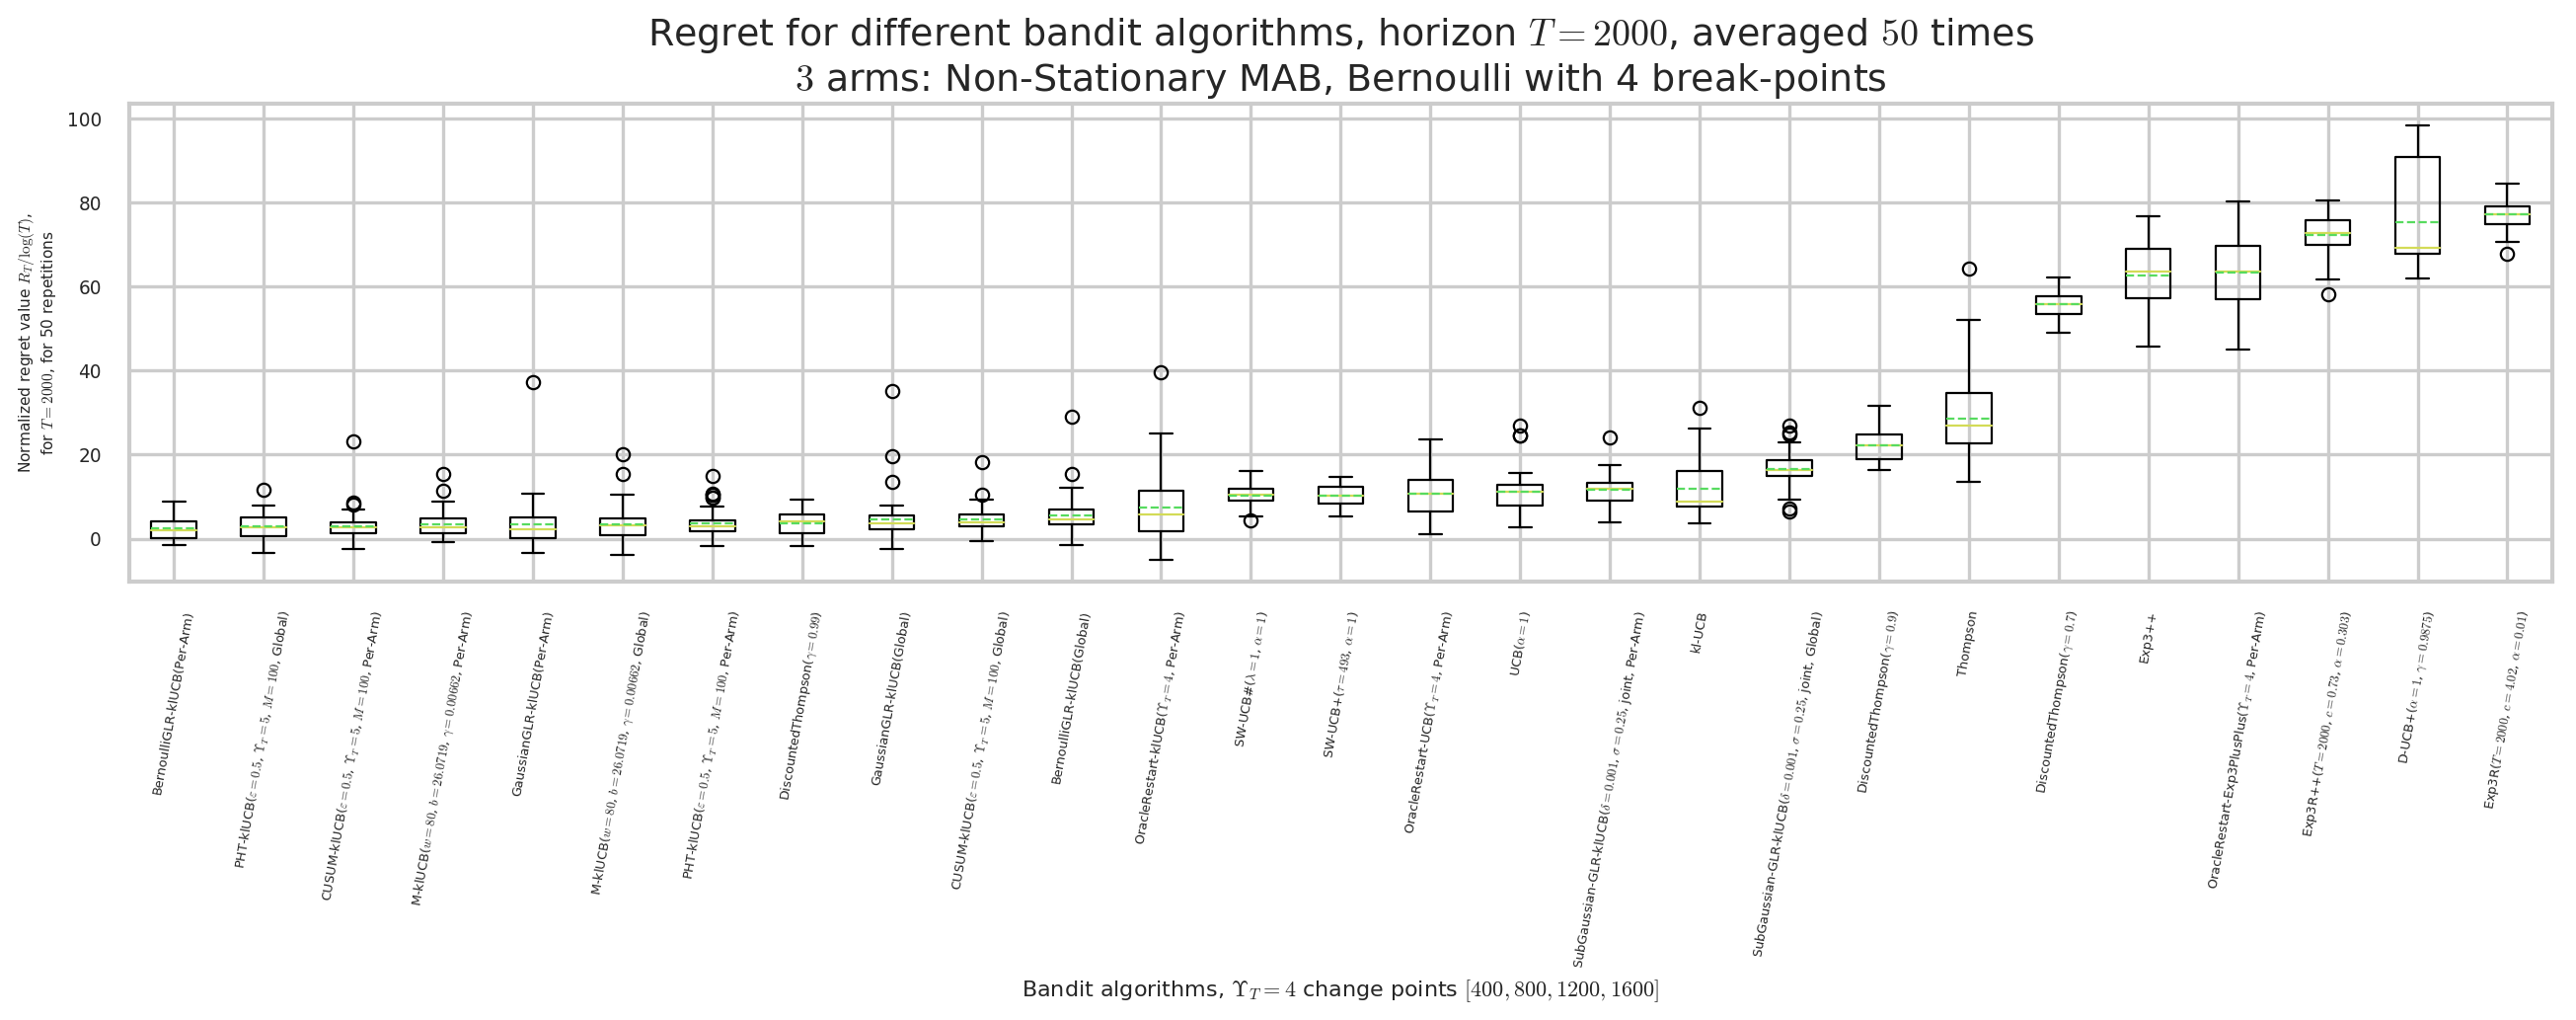


Plotting the mean and std running times ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__RunningTimes__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__RunningTimes__env1-2.png' created of size '258104b', at 'Wed Dec 19 17:46:22 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__RunningTimes__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__RunningTimes__env1-2.pdf' created of size '44962b', at 'Wed Dec 19 17:46:22 2018' ...


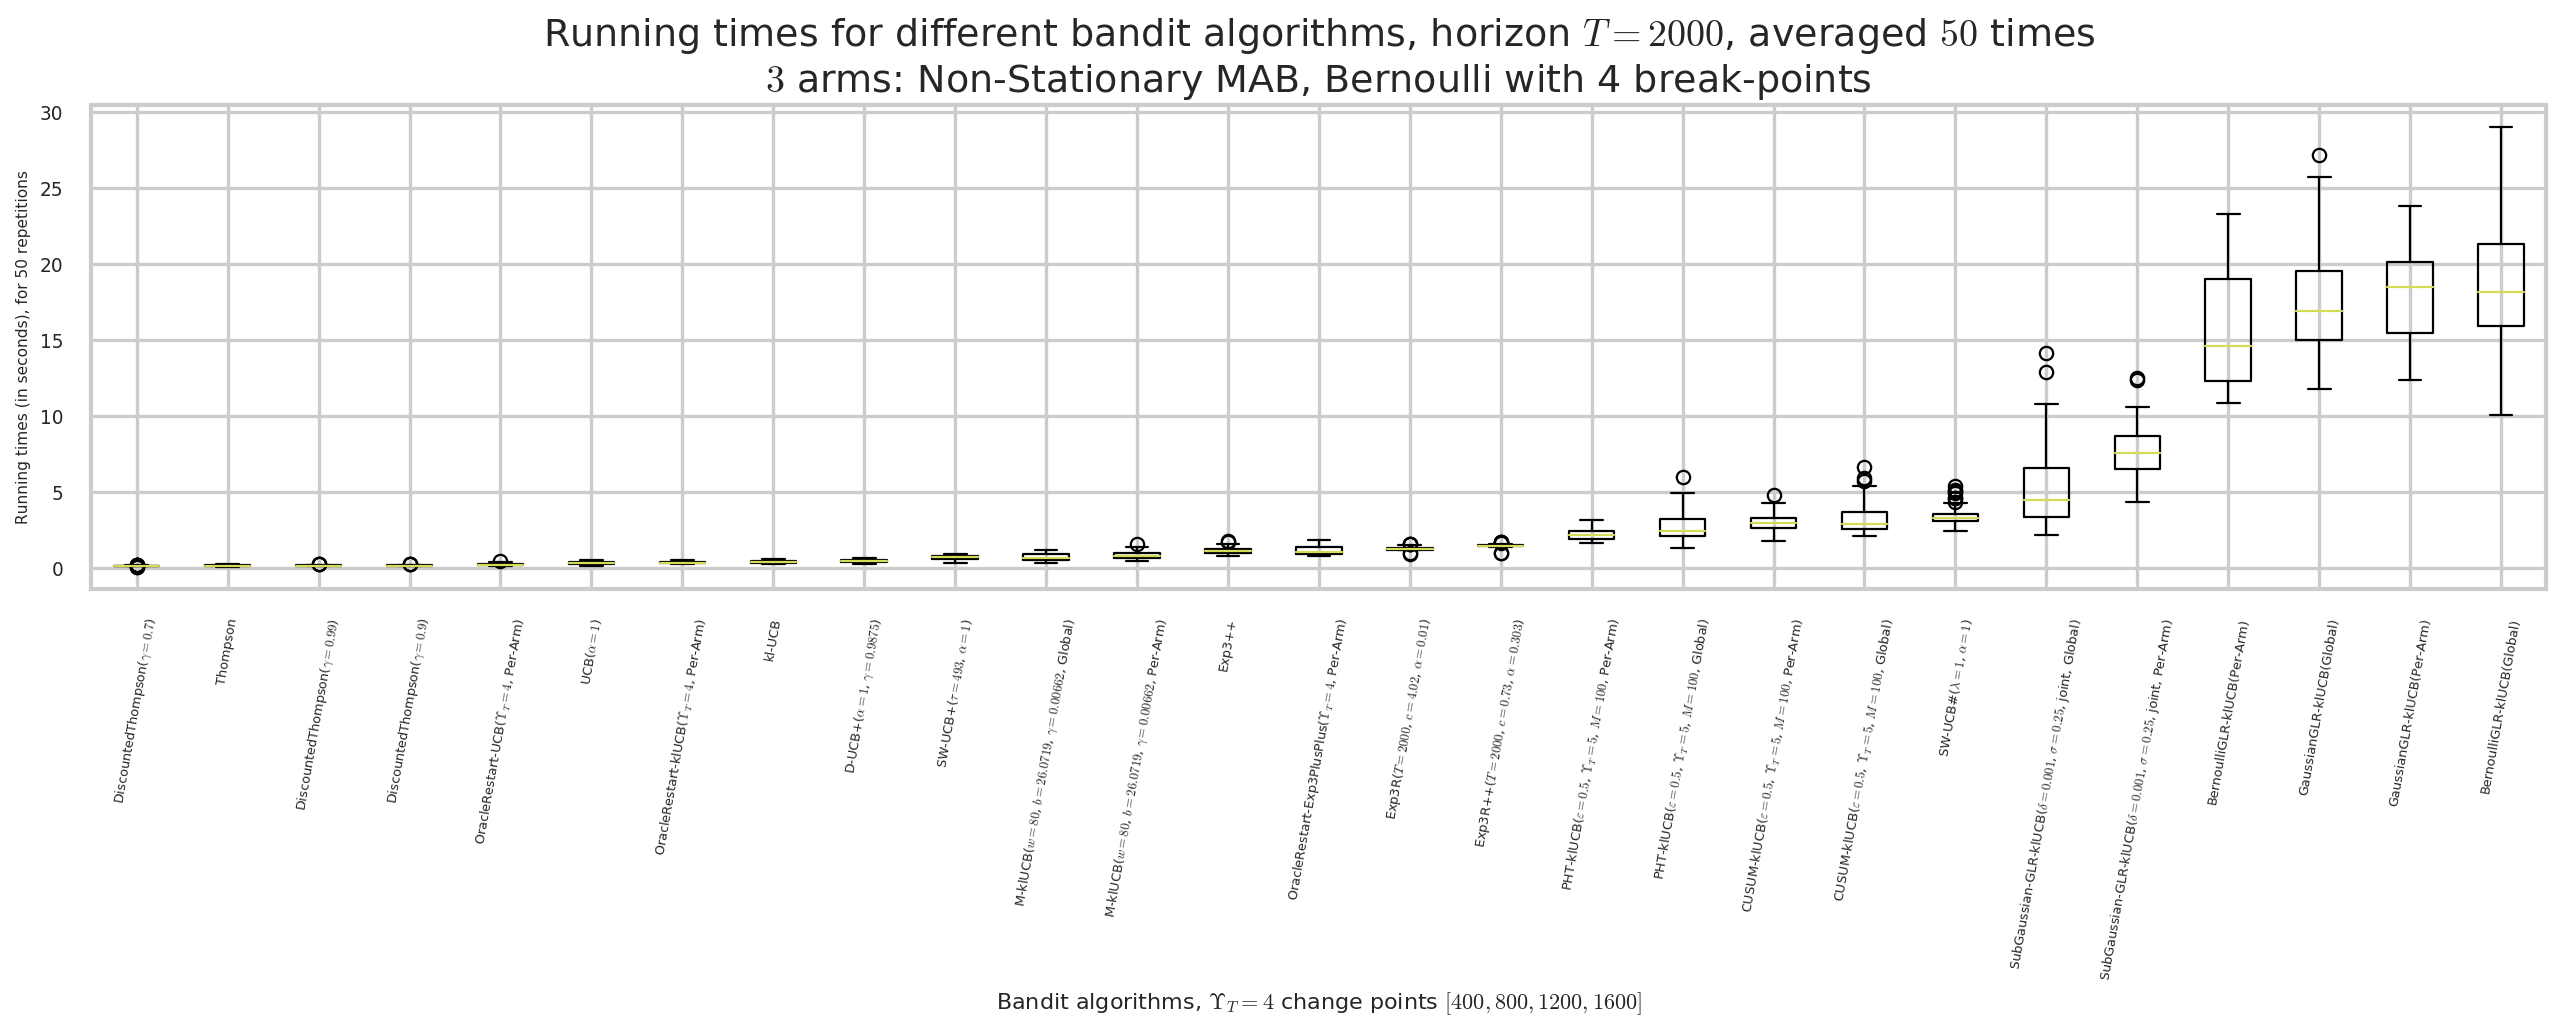


Plotting the mean and std memory consumption ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__MemoryConsumption__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__MemoryConsumption__env1-2.png' created of size '262365b', at 'Wed Dec 19 17:46:25 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__MemoryConsumption__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__MemoryConsumption__env1-2.pdf' created of size '45926b', at 'Wed Dec 19 17:46:26 2018' ...


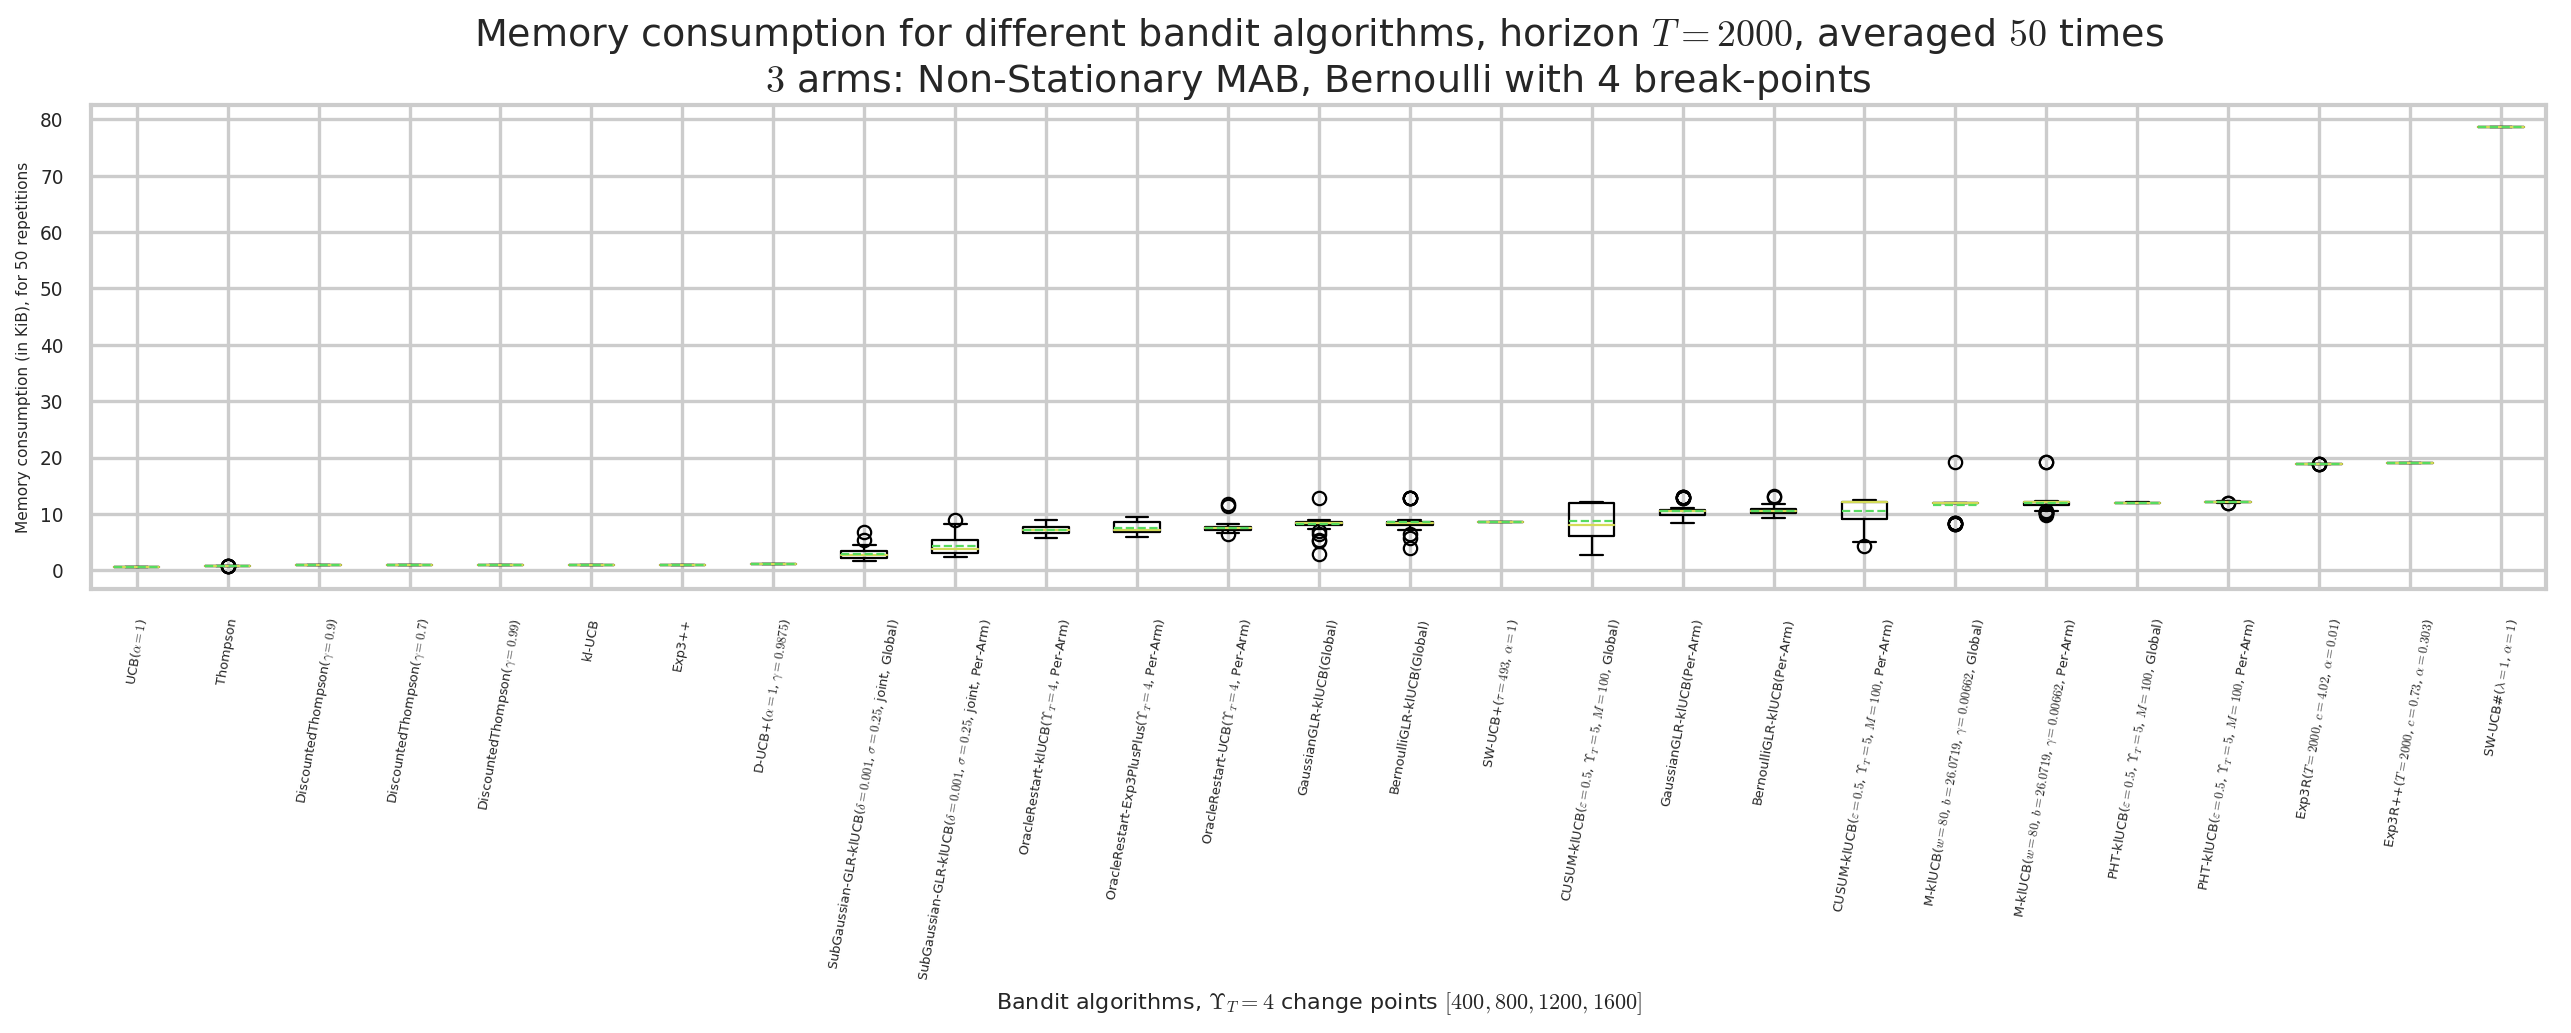


Plotting the mean regrets ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 30.00% ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__Regrets__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__Regrets__env1-2.png' created of size '450877b', at 'Wed Dec 19 17:46:29 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__Regrets__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__Regrets__env1-2.pdf' created of size '88974b', at 'Wed Dec 19 17:46:30 2018' ...


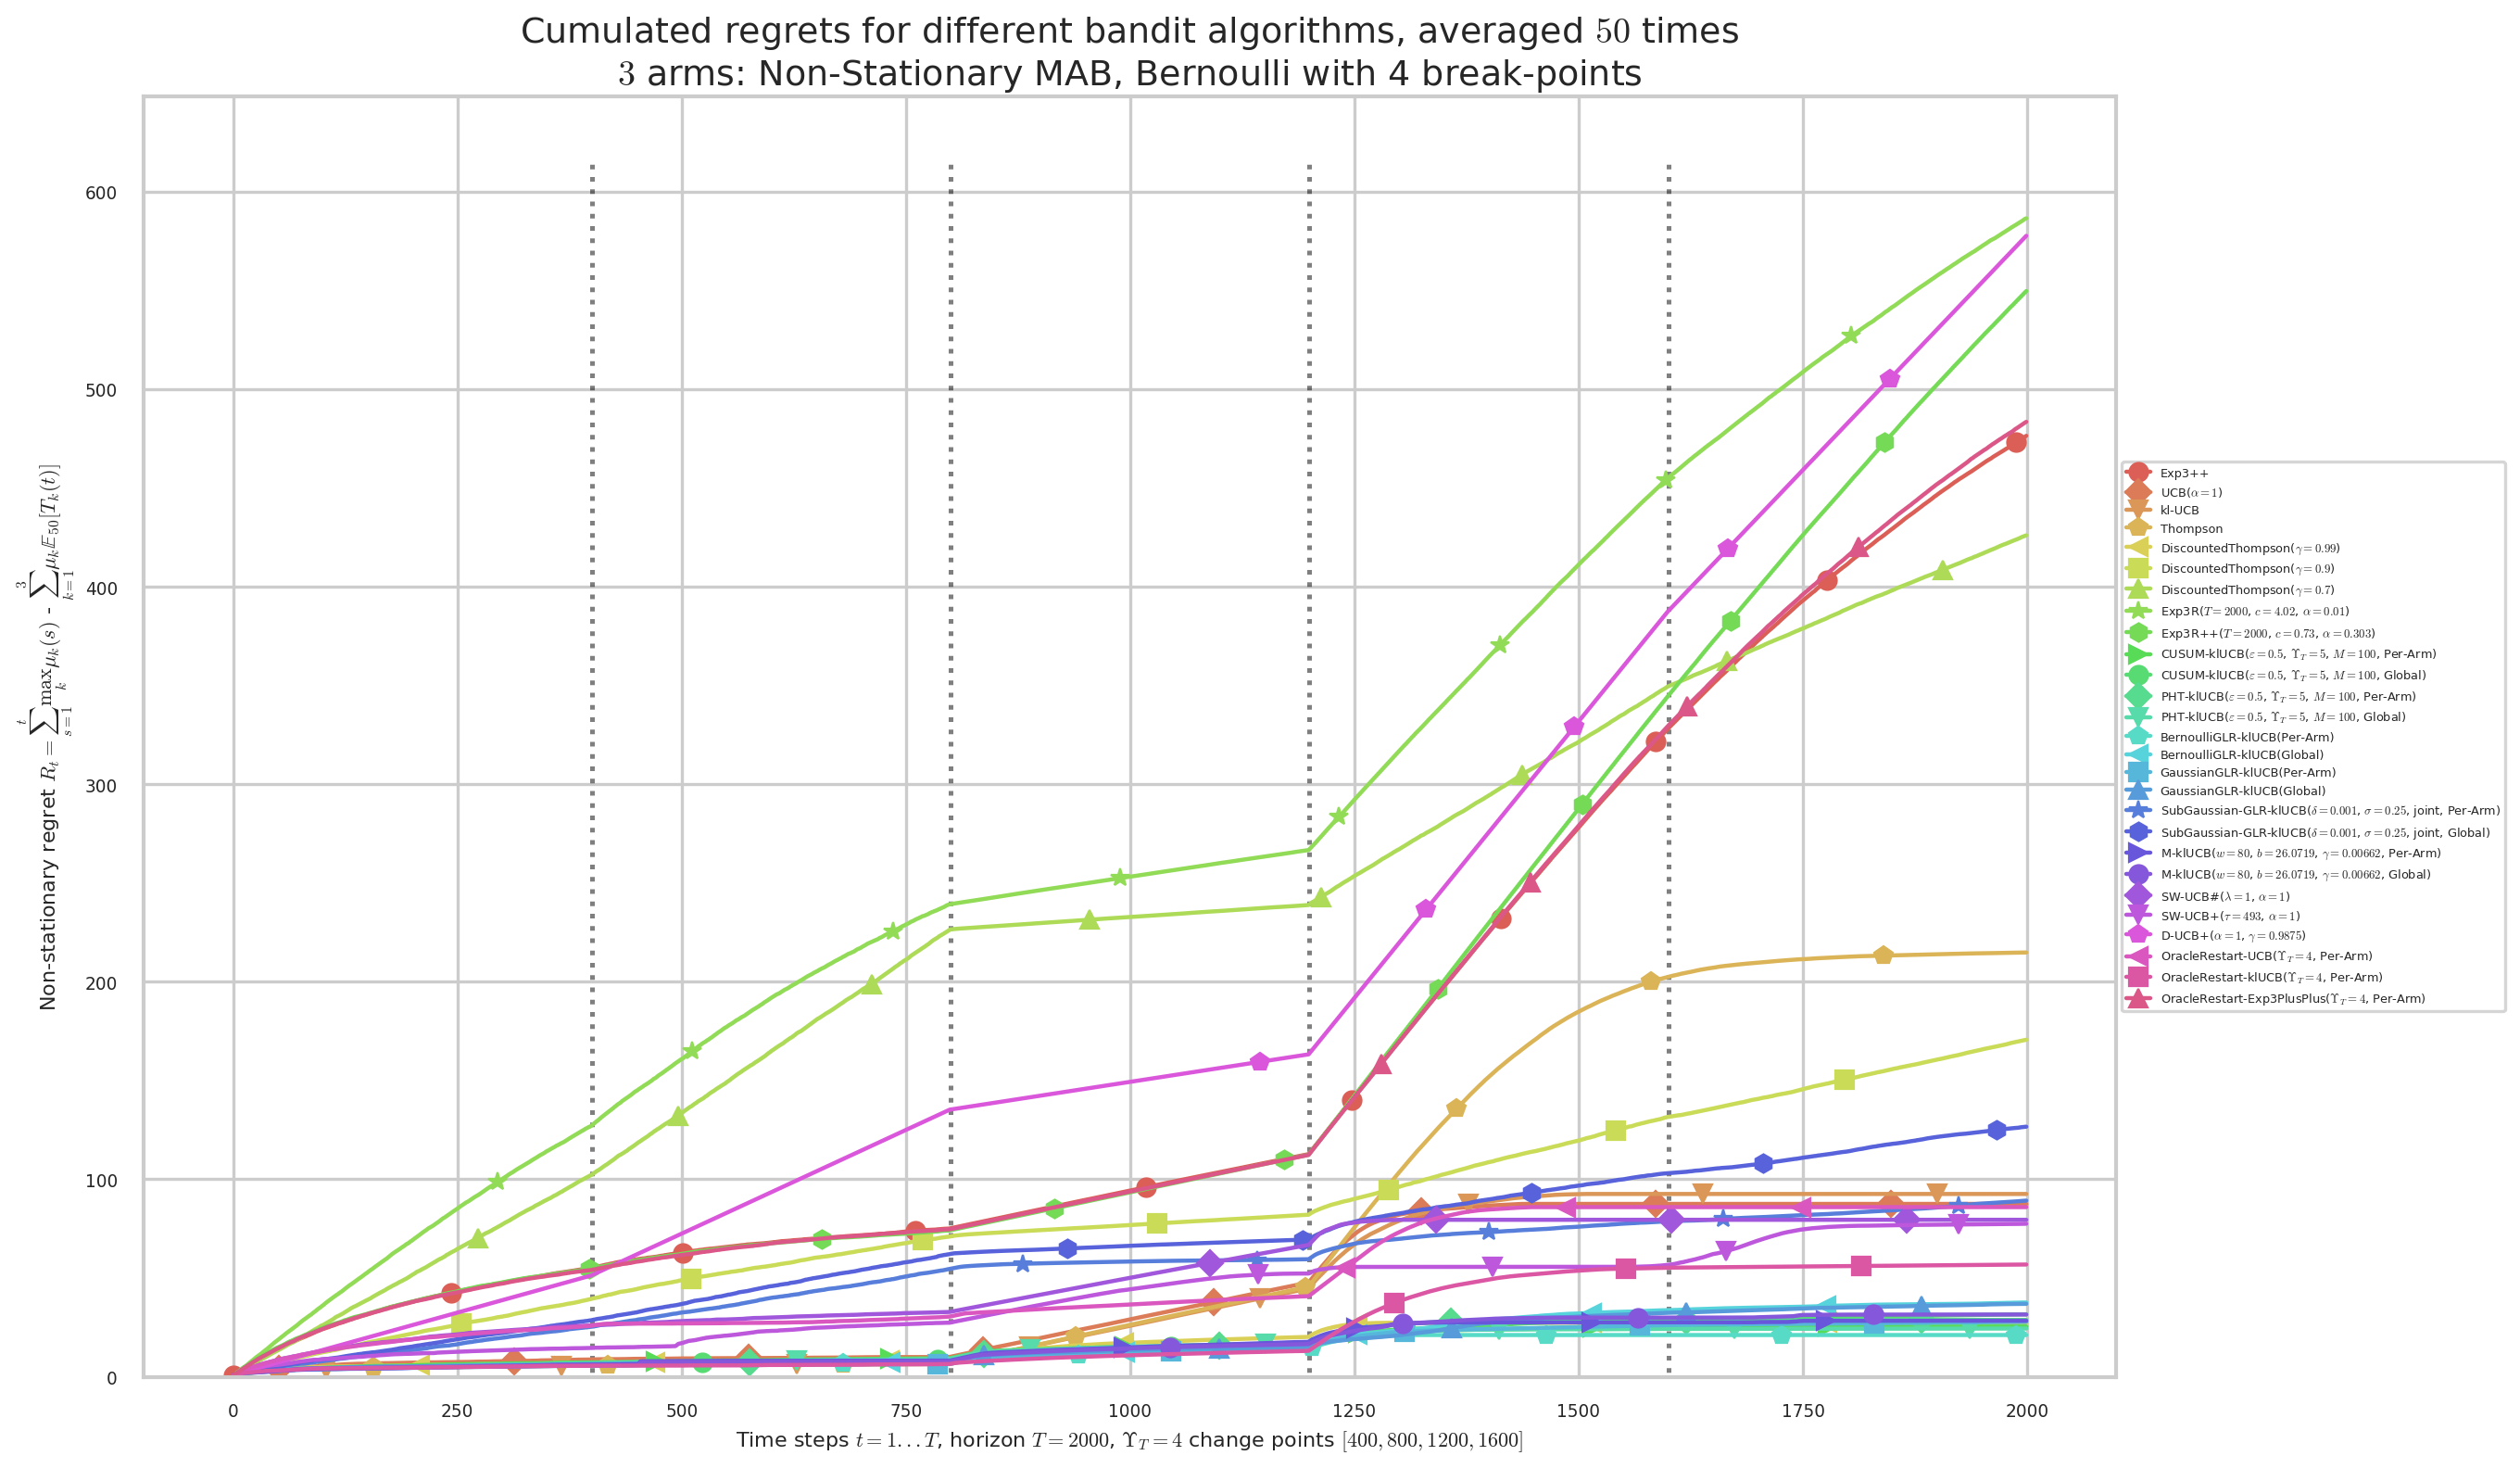


Plotting the mean rewards ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 30.00% ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__MeanReward__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__MeanReward__env1-2.png' created of size '526392b', at 'Wed Dec 19 17:46:33 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__MeanReward__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__MeanReward__env1-2.pdf' created of size '181615b', at 'Wed Dec 19 17:46:34 2018' ...


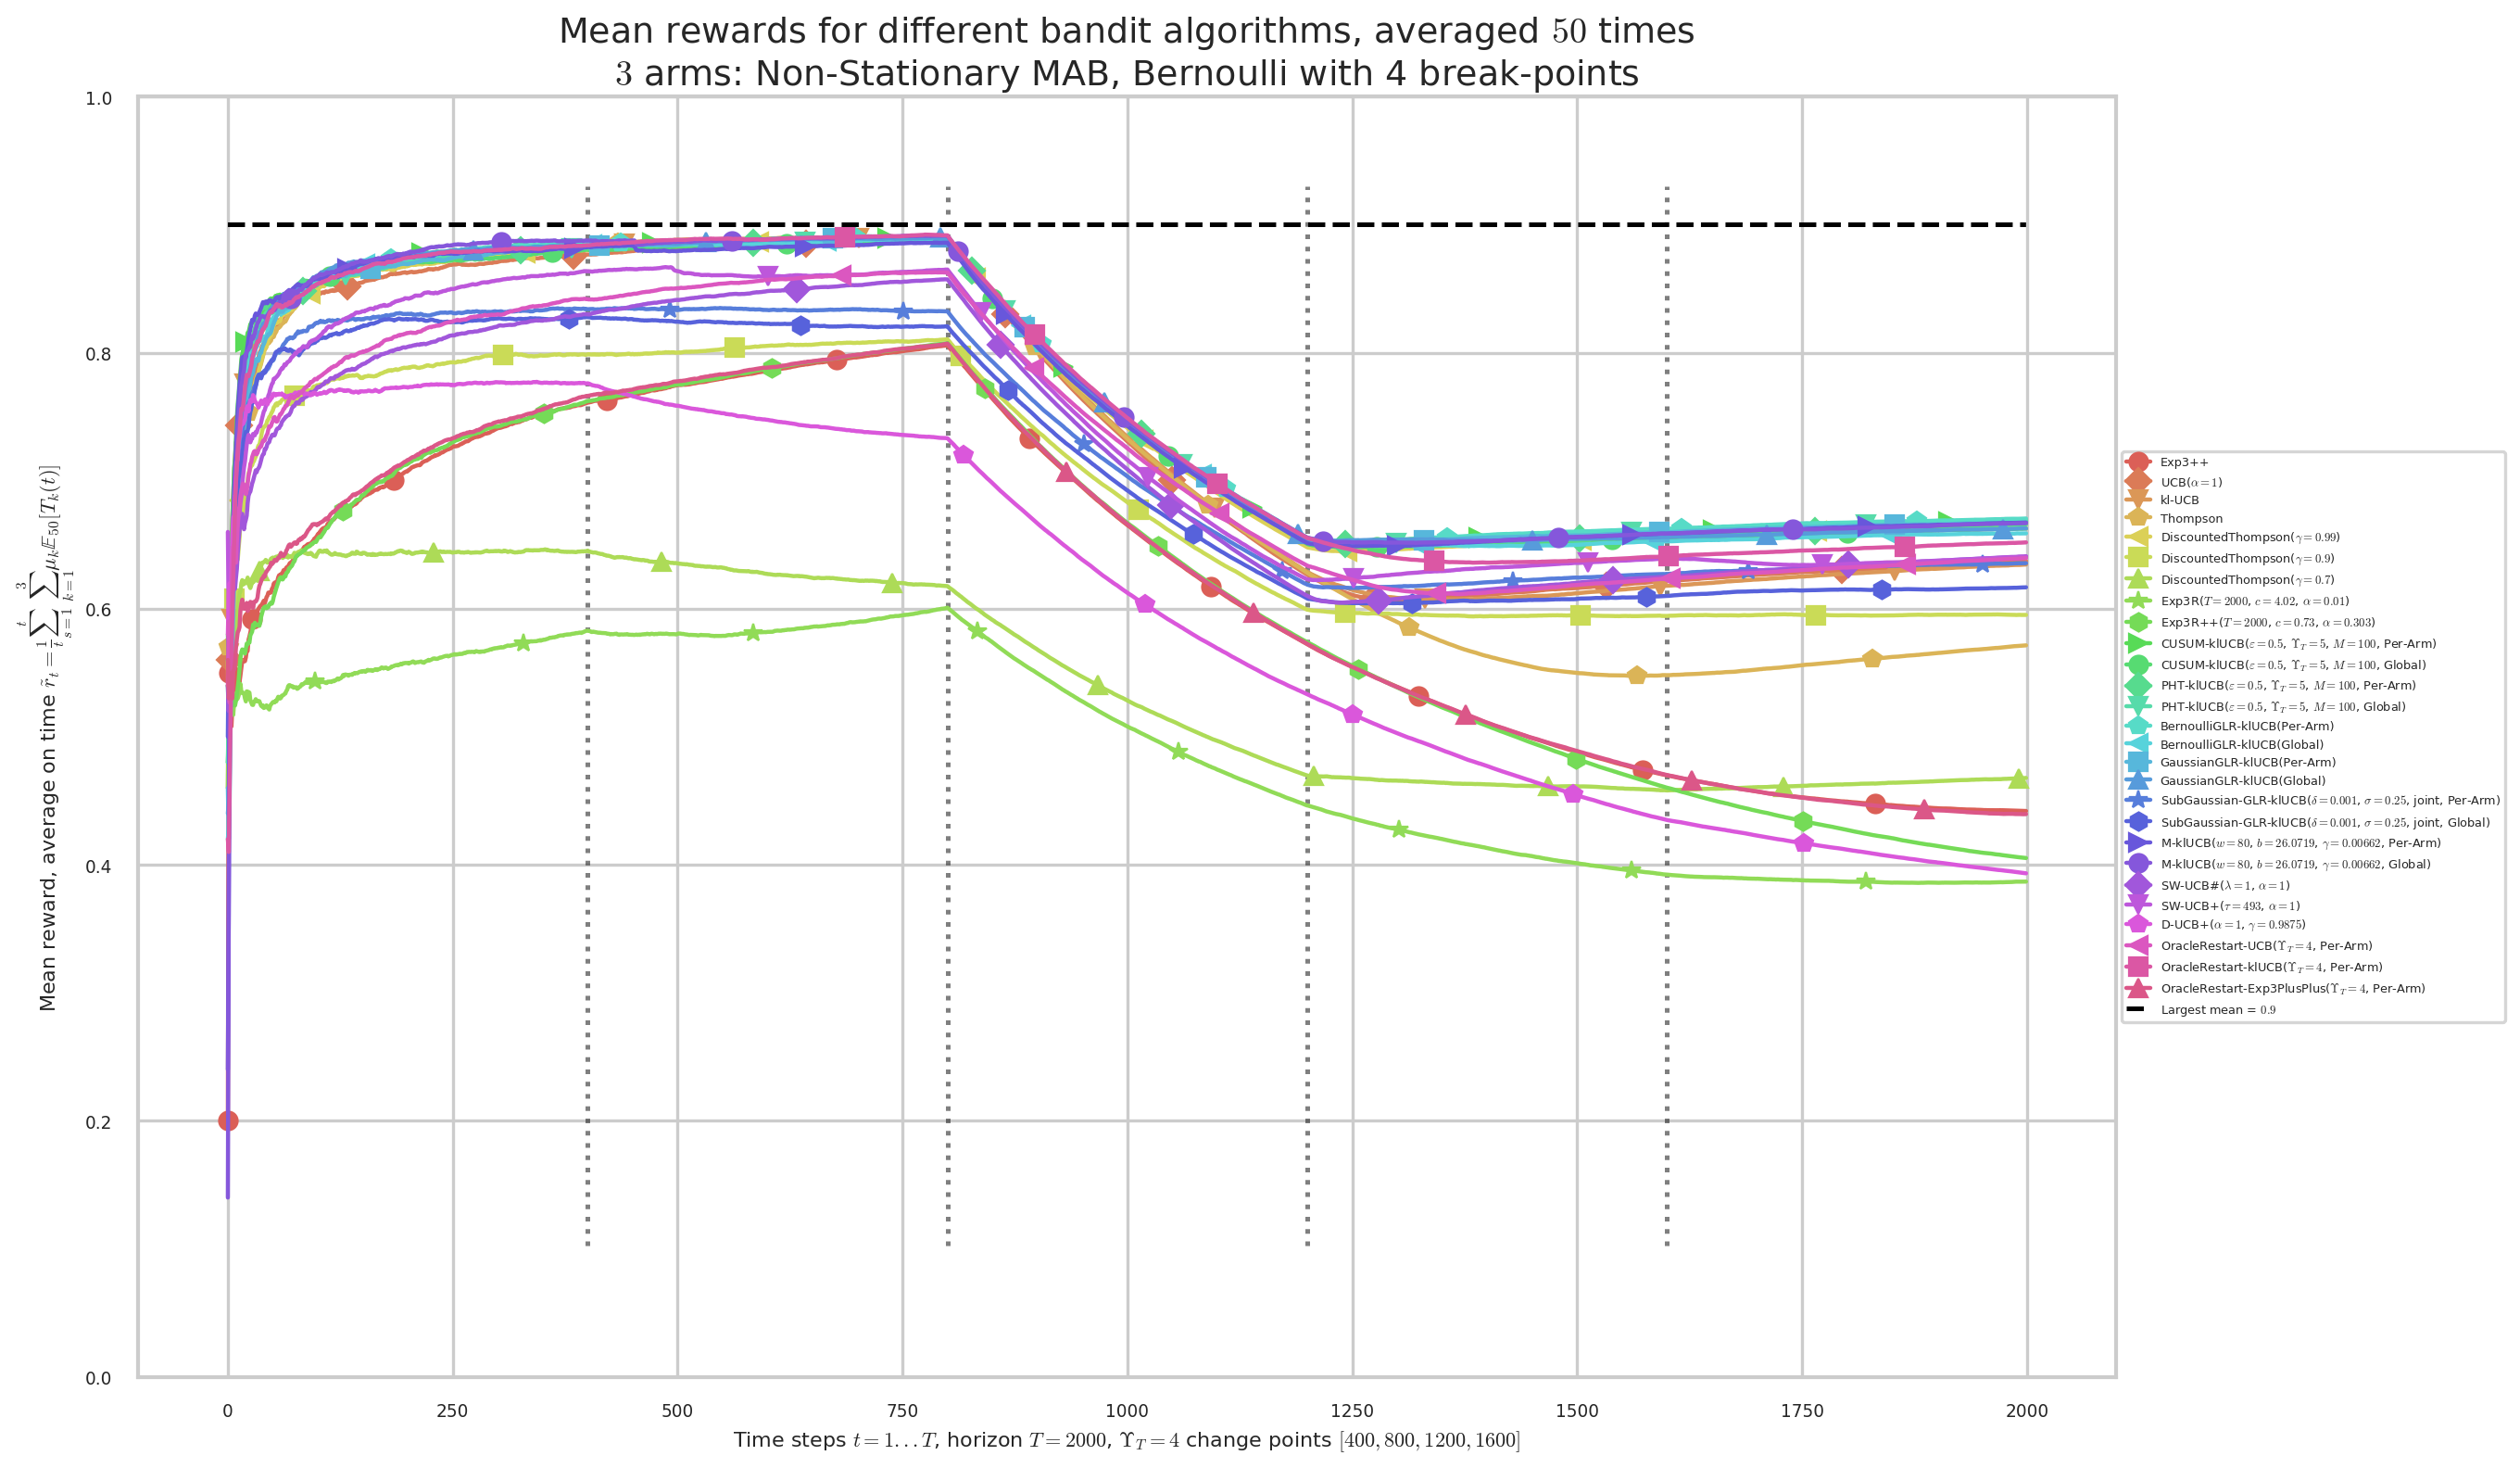


Plotting the best arm pulls ...


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__BestArmPulls__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__BestArmPulls__env1-2.png' created of size '671356b', at 'Wed Dec 19 17:46:37 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__BestArmPulls__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__BestArmPulls__env1-2.pdf' created of size '169383b', at 'Wed Dec 19 17:46:38 2018' ...


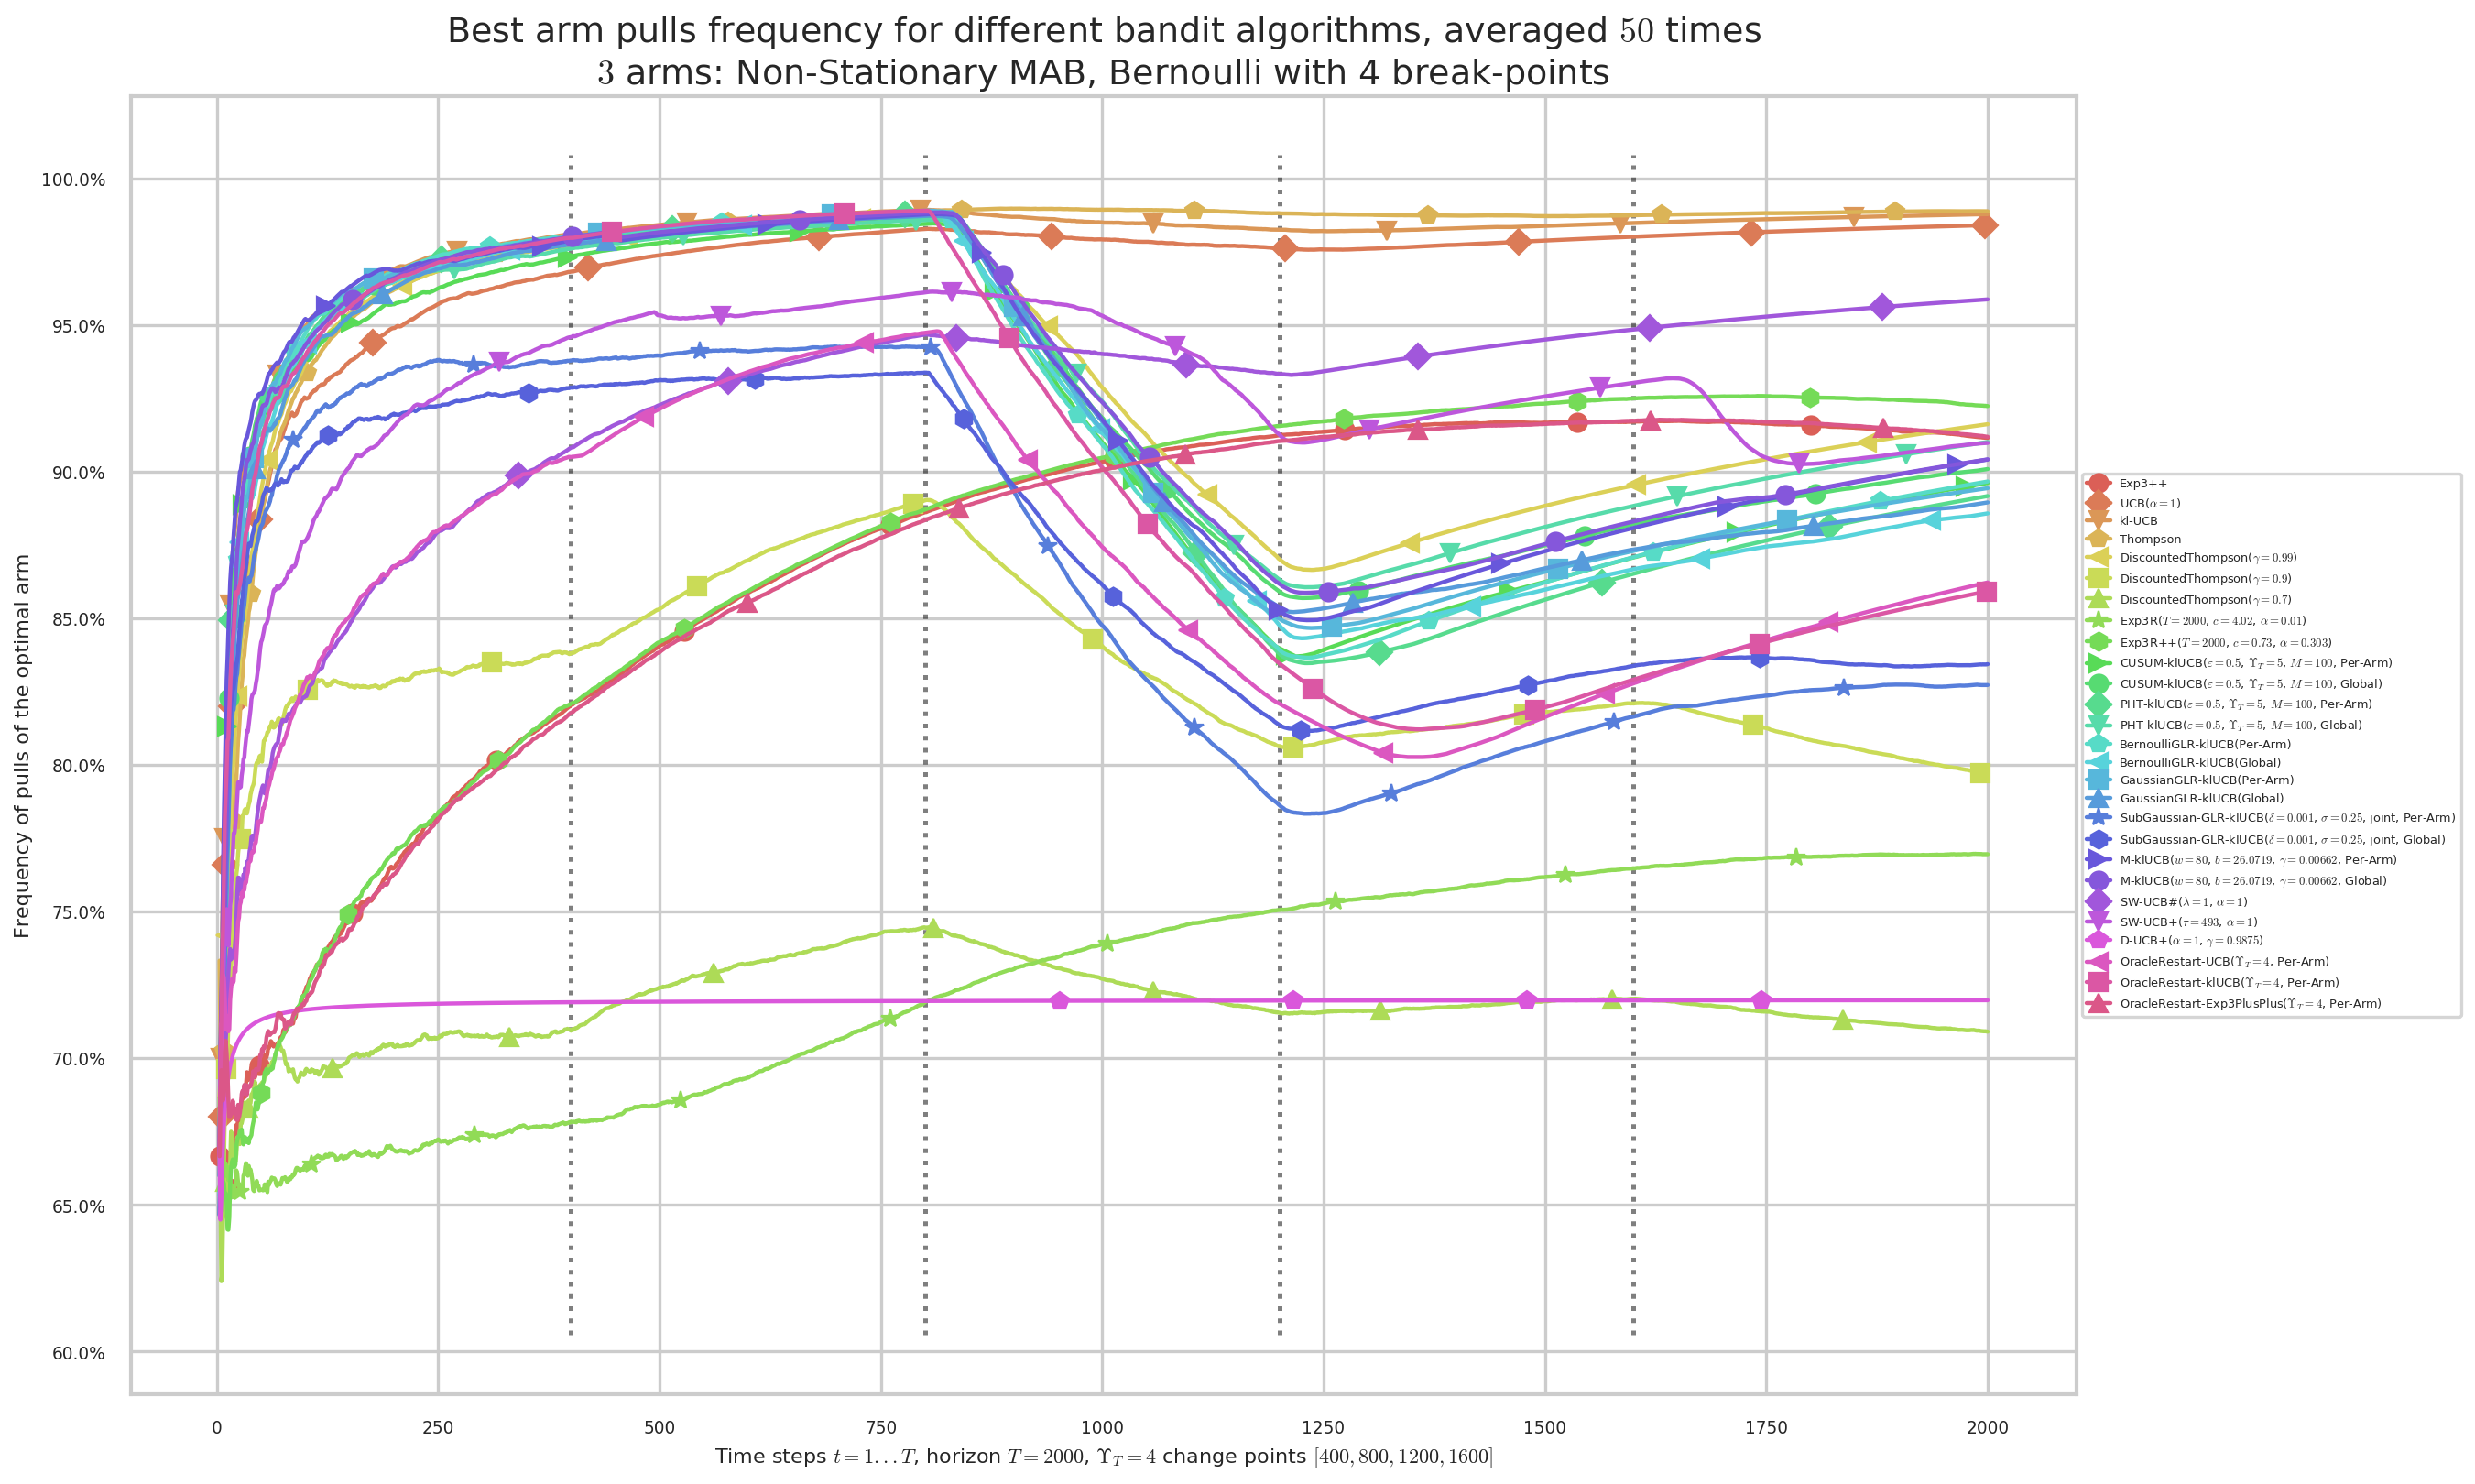


Plotting an histogram of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.png'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.png' created of size '239881b', at 'Wed Dec 19 17:46:21 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N50__27_algos/main__LastRegrets__env1-2.pdf' created of size '57805b', at 'Wed Dec 19 17:46:21 2018' ...


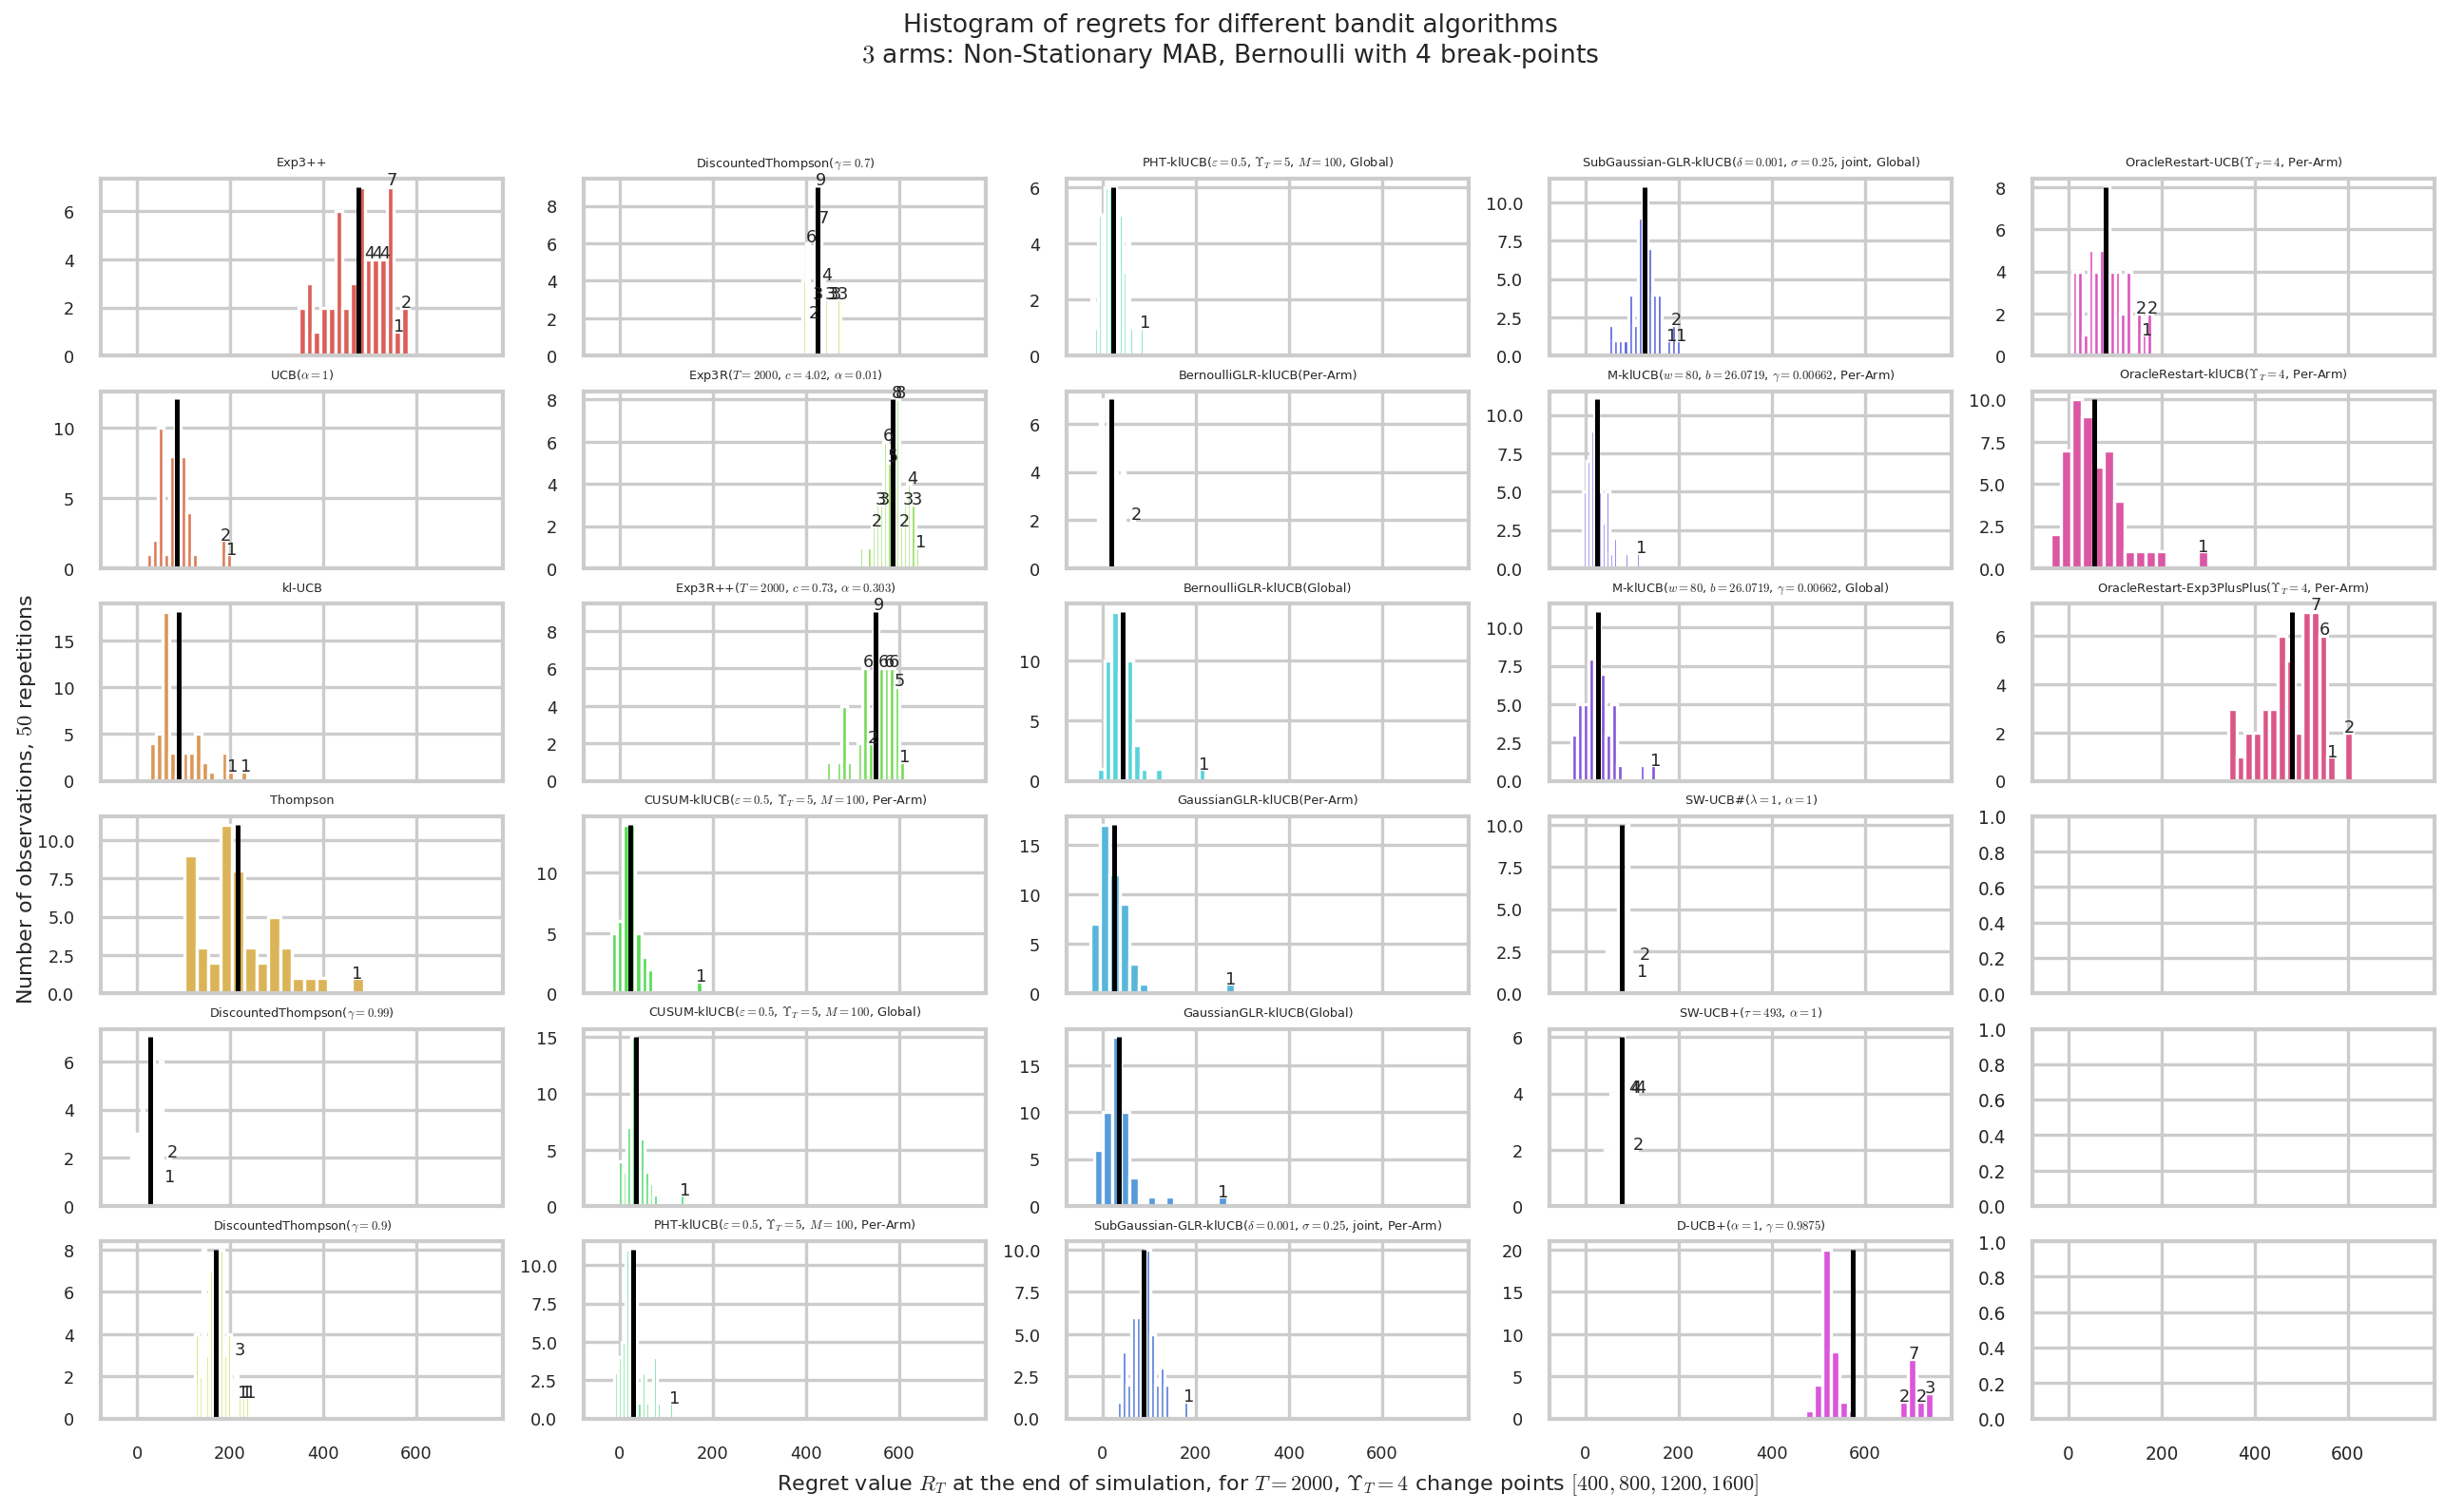

In [81]:
_ = plotAll(evaluation, envId, mainfig=mainfig)

### Second problem with changes on all arms (Global restart should be better)

Let's first print the results then plot them:

In [40]:
envId = 1

Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__HistoryOfMeans__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__HistoryOfMeans__env2-2.png' created of size '87820b', at 'Wed Dec 19 17:09:57 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__HistoryOfMeans__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__HistoryOfMeans__env2-2.pdf' created of size '24393b', at 'Wed Dec 19 17:09:58 2018' ...


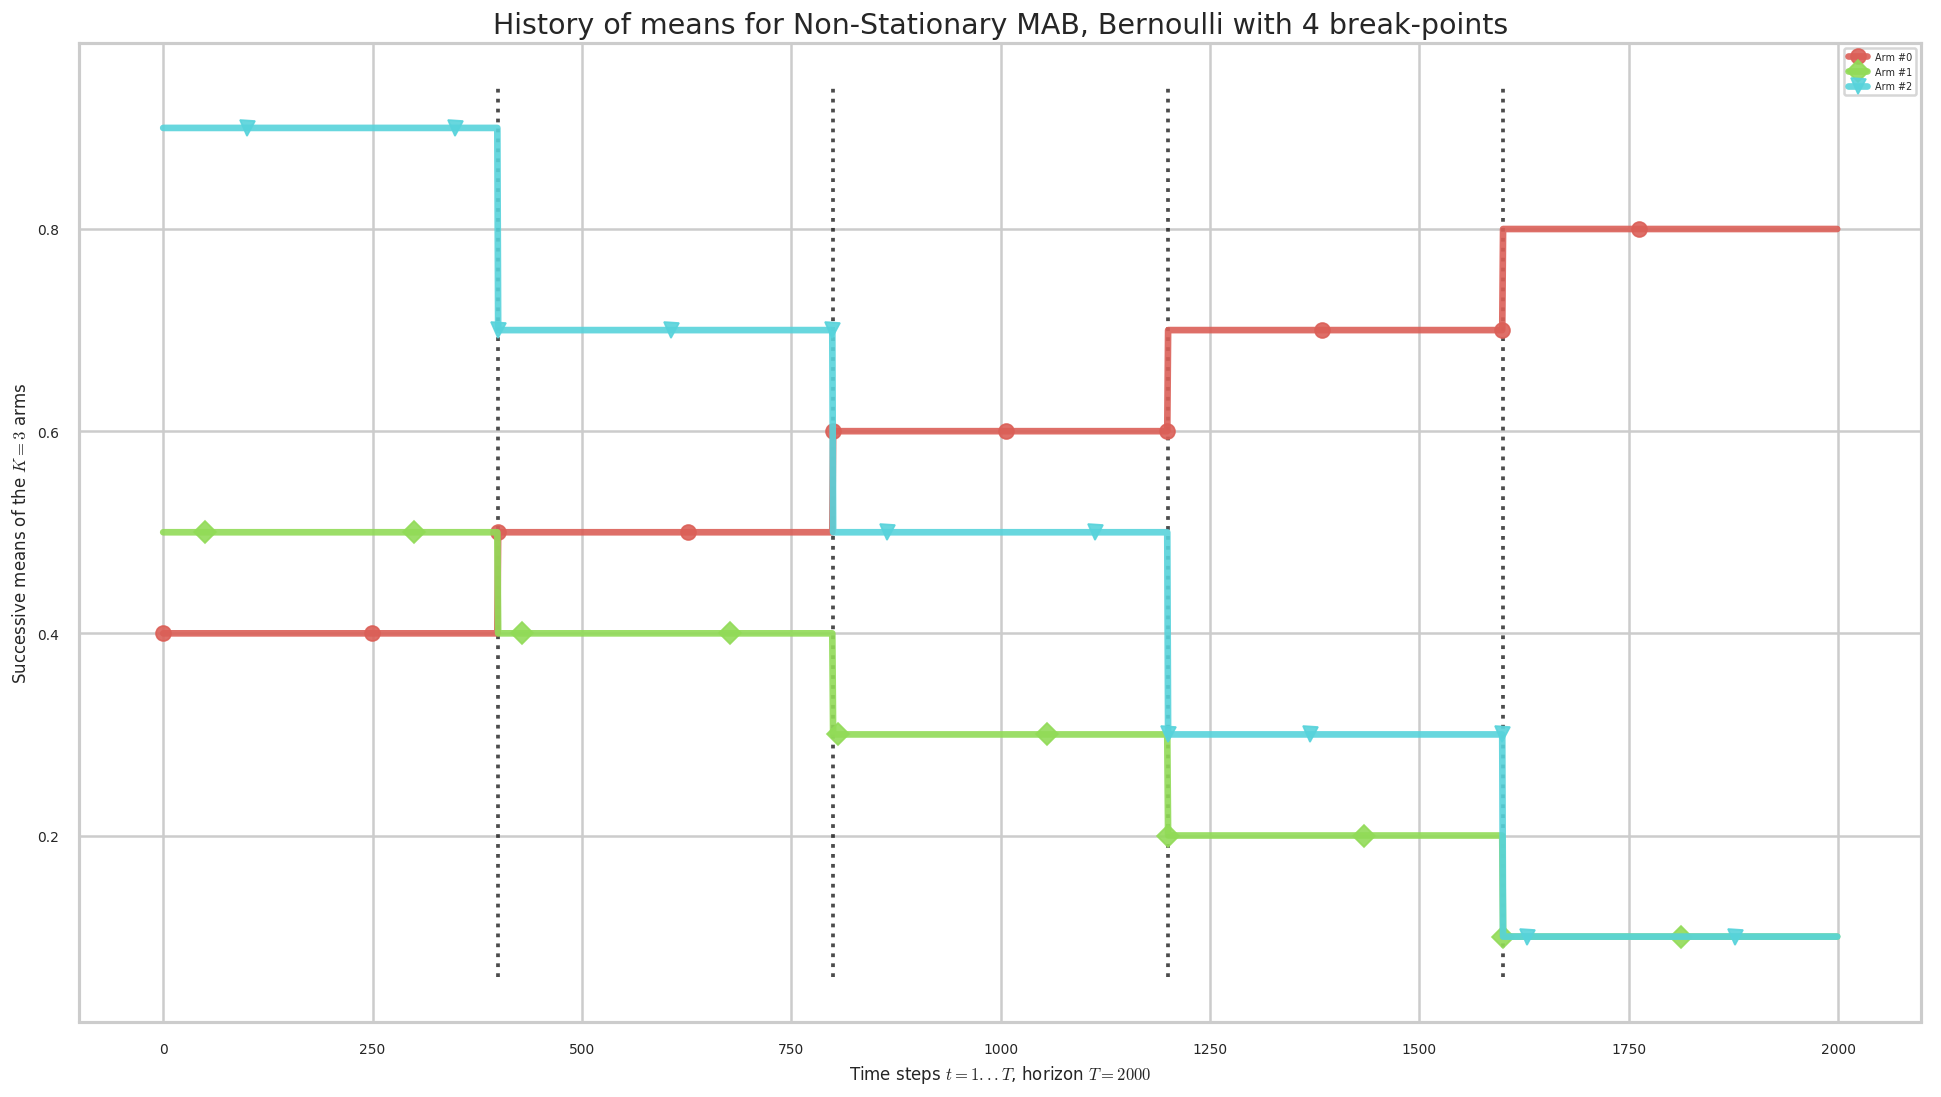

In [41]:
_ = evaluation.plotHistoryOfMeans(envId, savefig="{}__HistoryOfMeans__env{}-{}".format(mainfig, envId+1, len(evaluation.envs)))

In [42]:
_ = printAll(evaluation, envId)


Giving the vector of final regrets ...

  For policy #0 called 'Exp3++' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 359
Mean of   last regrets R_T = 359
Median of last regrets R_T = 359
Max of    last regrets R_T = 359
STD of    last regrets R_T = 5.68e-14

  For policy #1 called 'UCB($\alpha=1$)' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 90.1
Mean of   last regrets R_T = 90.1
Median of last regrets R_T = 90.1
Max of    last regrets R_T = 90.1
STD of    last regrets R_T = 0

  For policy #2 called 'kl-UCB' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 72.6
Mean of   last regrets R_T = 72.6
Median of last regrets R_T = 72.6
Max of    last regrets R_T = 72.6
STD of    last regrets R_T = 0

  For policy #3 called 'Thompson' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 202
Mean of   last regrets R_T = 202
Median of last regrets R_T = 202
Max of    last regrets R_T


Plotting a boxplot of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.png' created of size '175728b', at 'Wed Dec 19 17:10:01 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.pdf' created of size '46885b', at 'Wed Dec 19 17:10:02 2018' ...


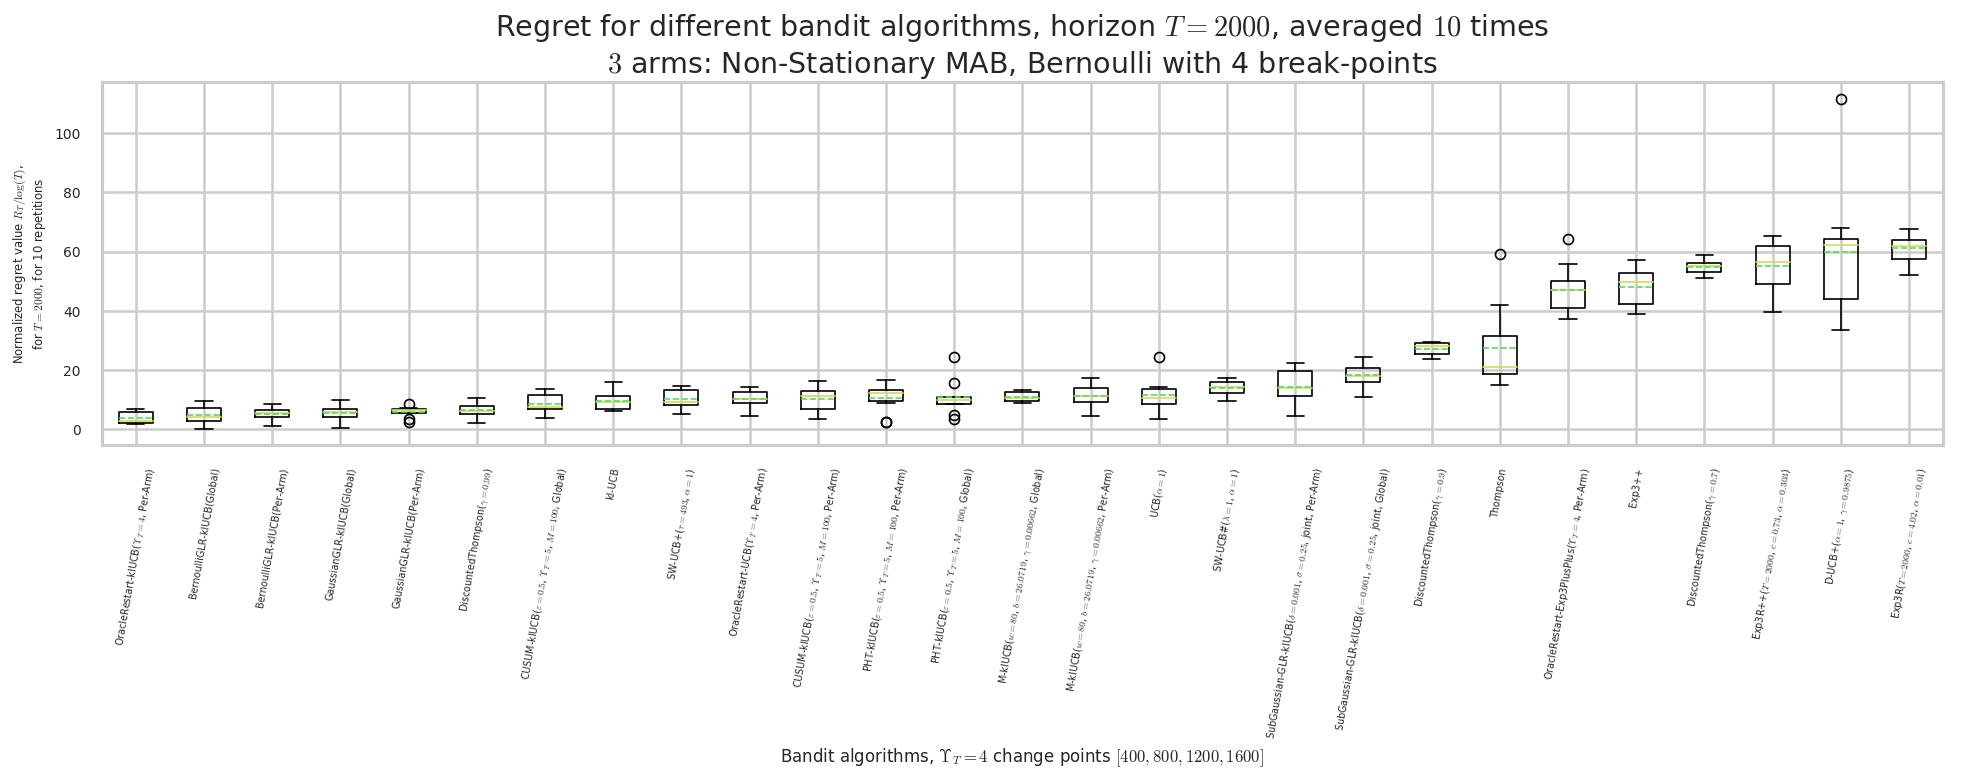


Plotting the mean and std running times ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__RunningTimes__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__RunningTimes__env2-2.png' created of size '172500b', at 'Wed Dec 19 17:10:06 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__RunningTimes__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__RunningTimes__env2-2.pdf' created of size '45994b', at 'Wed Dec 19 17:10:07 2018' ...


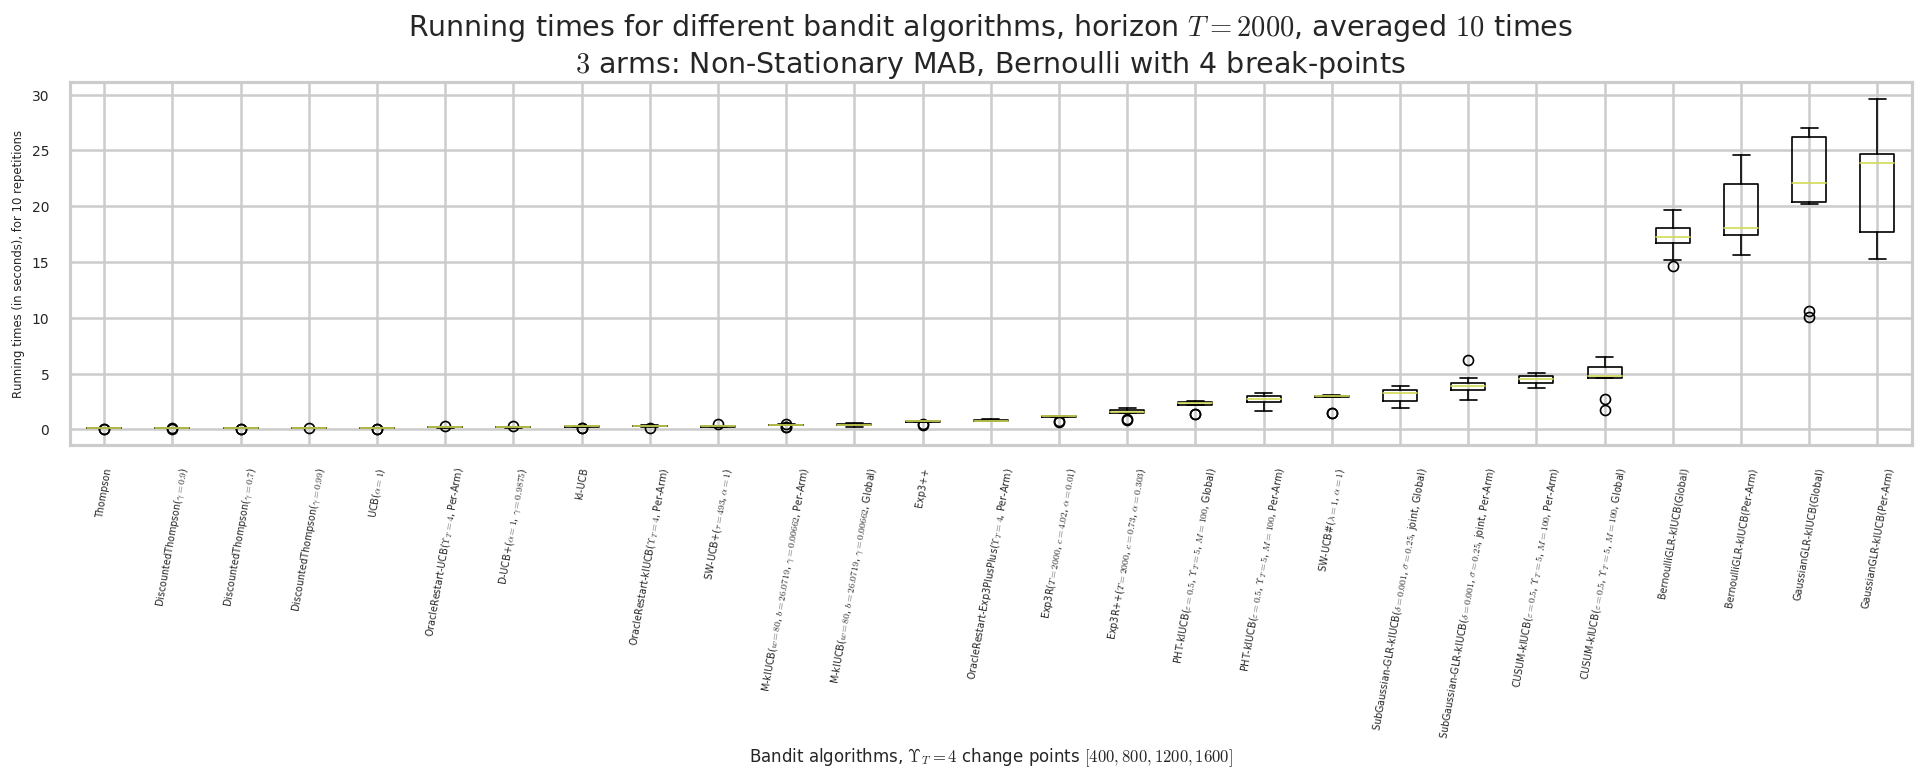


Plotting the mean and std memory consumption ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__MemoryConsumption__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__MemoryConsumption__env2-2.png' created of size '172934b', at 'Wed Dec 19 17:10:10 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__MemoryConsumption__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__MemoryConsumption__env2-2.pdf' created of size '43827b', at 'Wed Dec 19 17:10:11 2018' ...


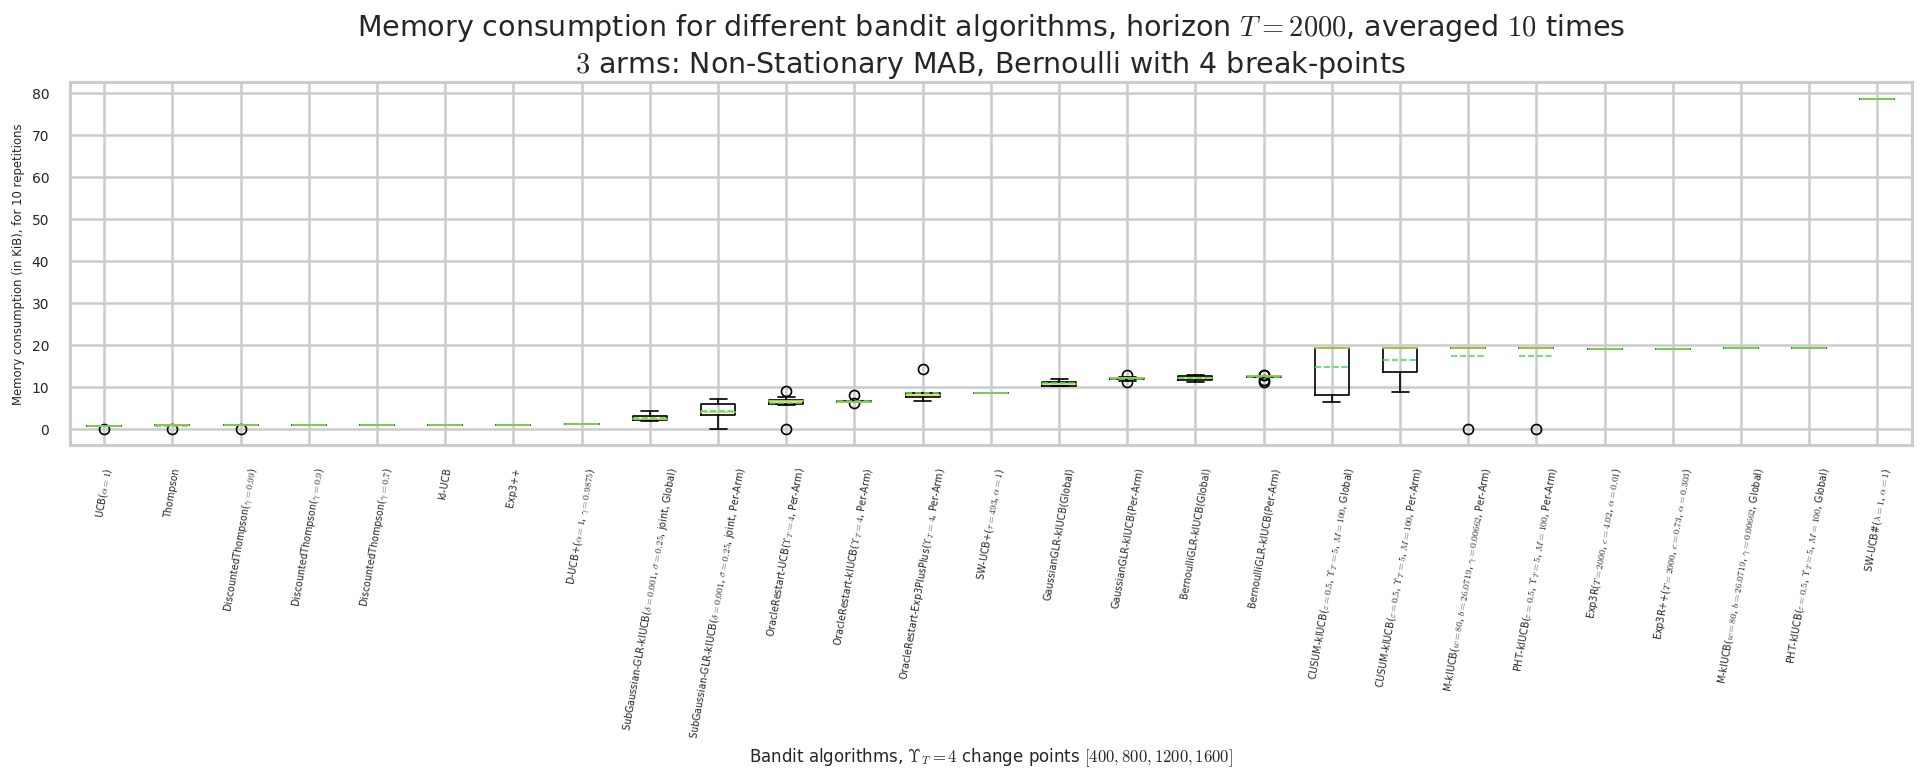


Plotting the mean regrets ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.45 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.67% ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__Regrets__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__Regrets__env2-2.png' created of size '362499b', at 'Wed Dec 19 17:10:14 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__Regrets__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__Regrets__env2-2.pdf' created of size '129263b', at 'Wed Dec 19 17:10:14 2018' ...


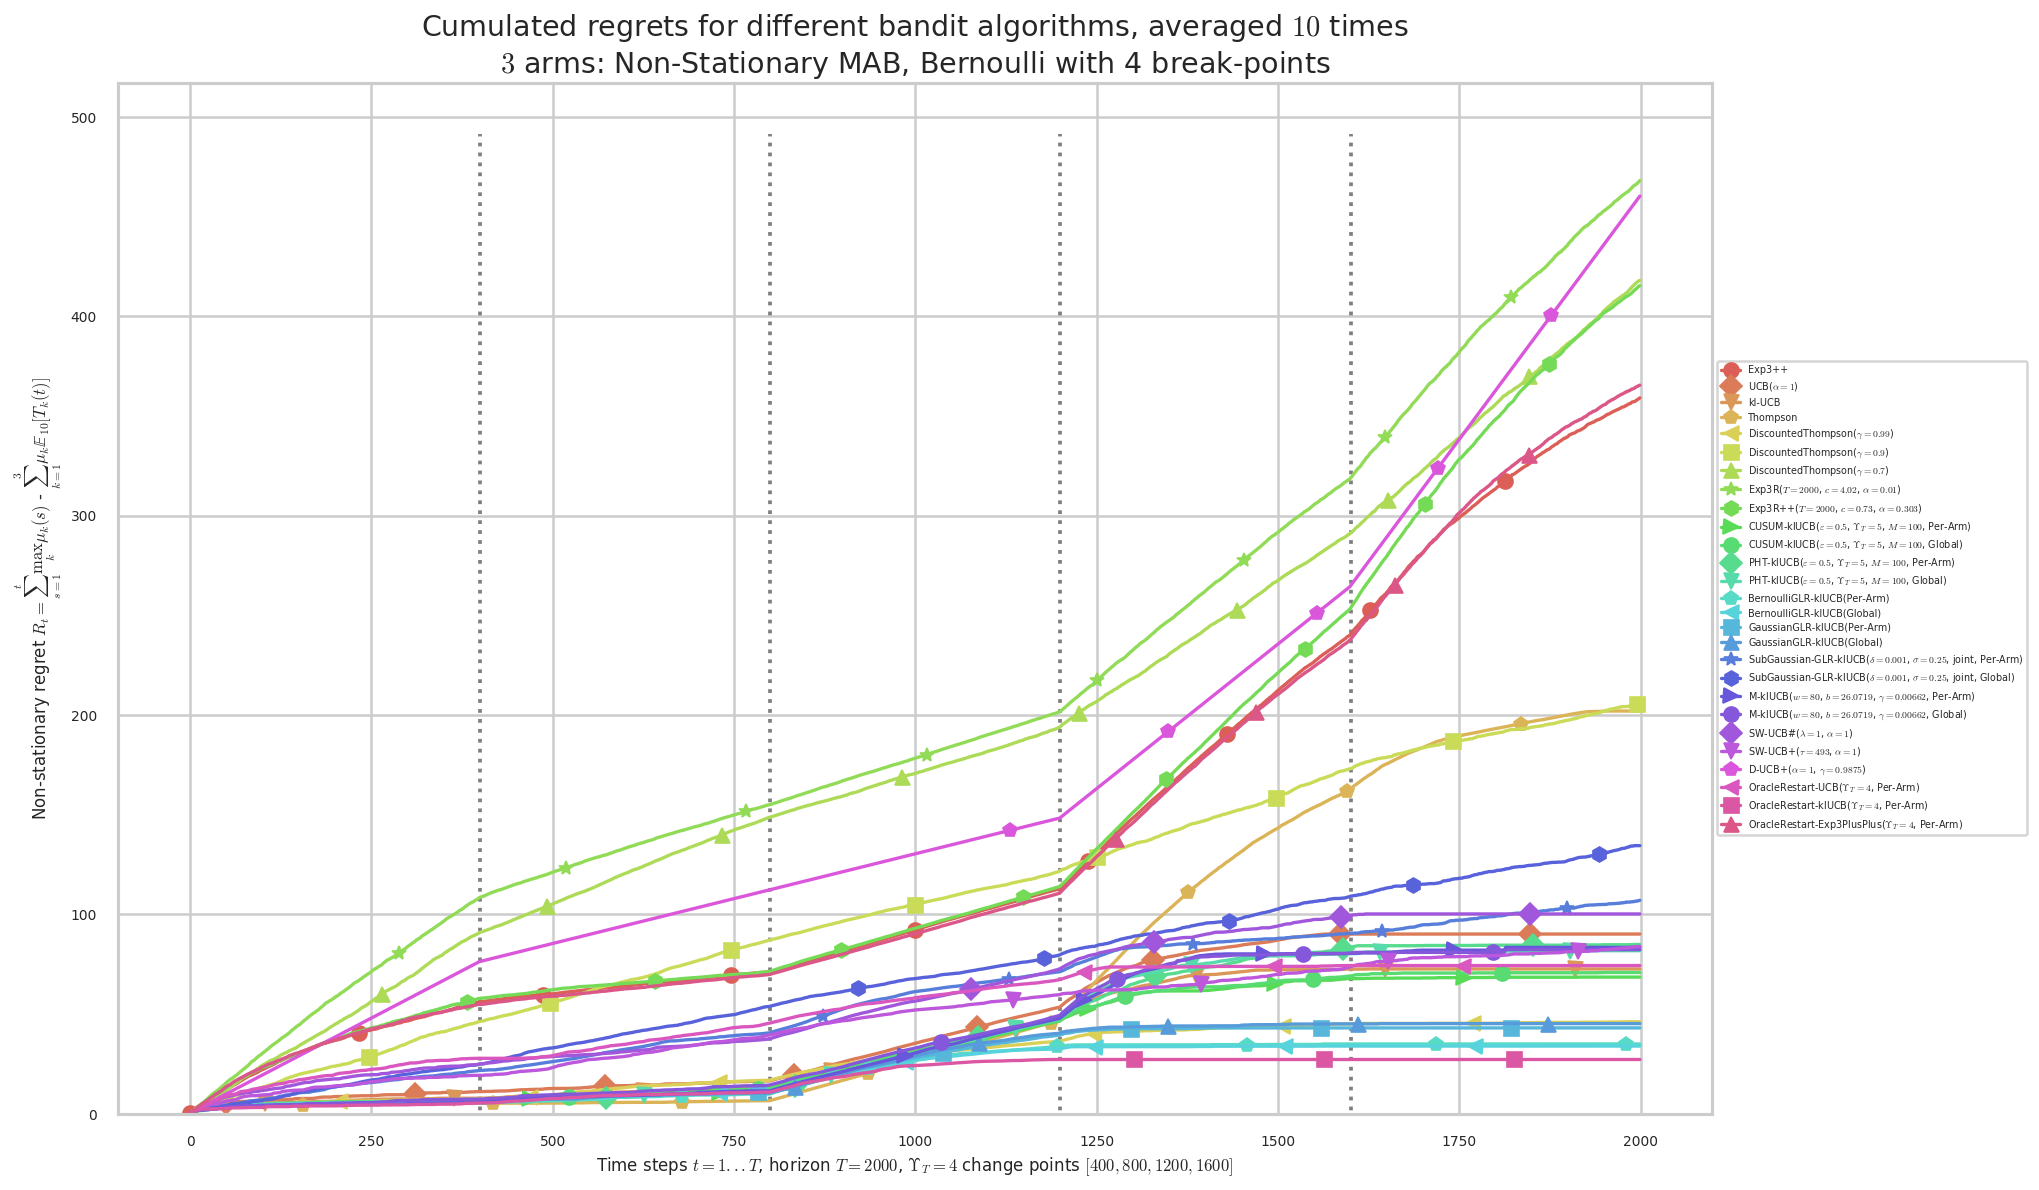


Plotting the mean rewards ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.45 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.67% ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__MeanReward__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__MeanReward__env2-2.png' created of size '398408b', at 'Wed Dec 19 17:10:16 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__MeanReward__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__MeanReward__env2-2.pdf' created of size '293079b', at 'Wed Dec 19 17:10:17 2018' ...


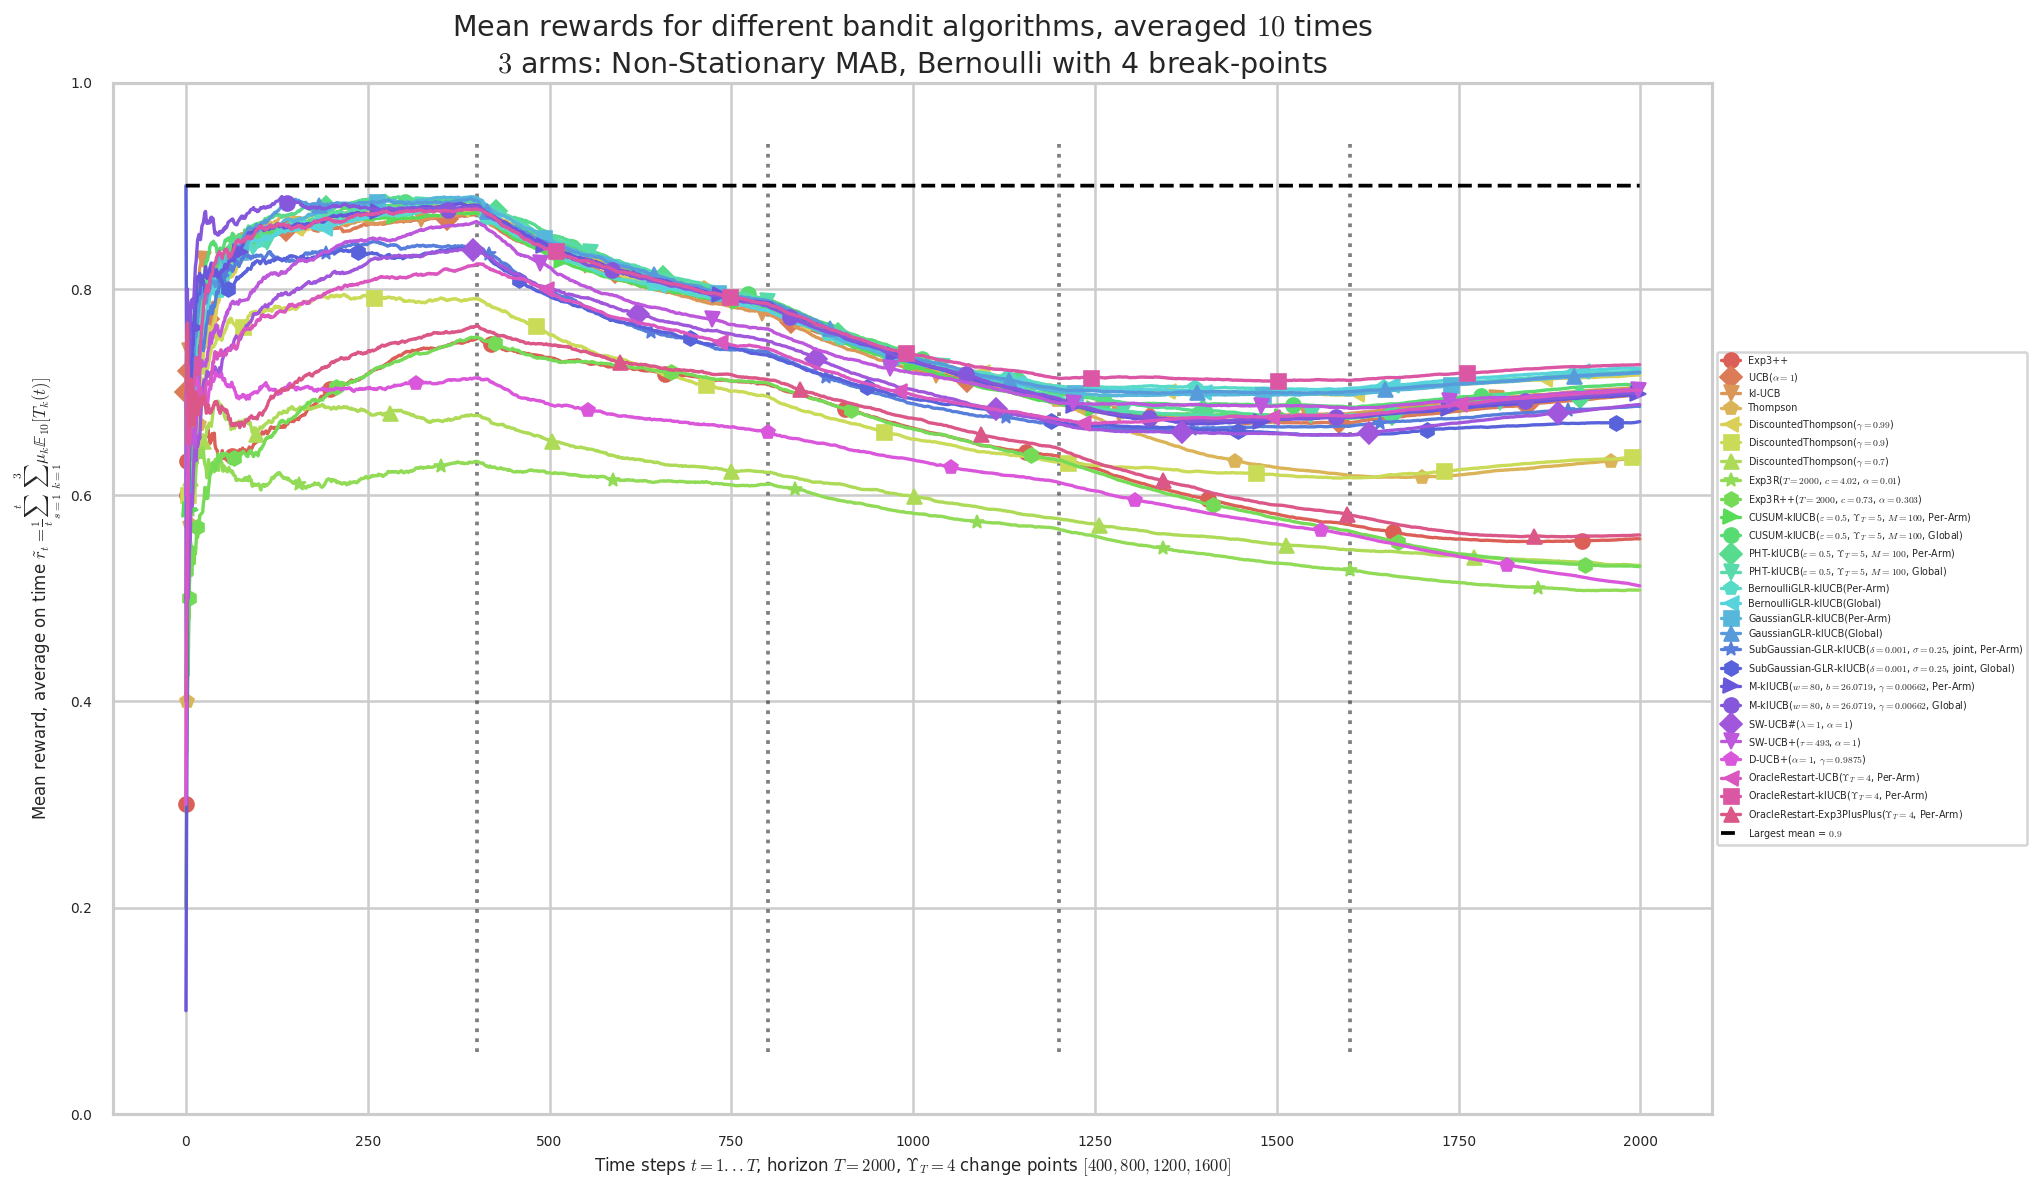


Plotting the best arm pulls ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__BestArmPulls__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__BestArmPulls__env2-2.png' created of size '403464b', at 'Wed Dec 19 17:10:19 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__BestArmPulls__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__BestArmPulls__env2-2.pdf' created of size '190480b', at 'Wed Dec 19 17:10:20 2018' ...


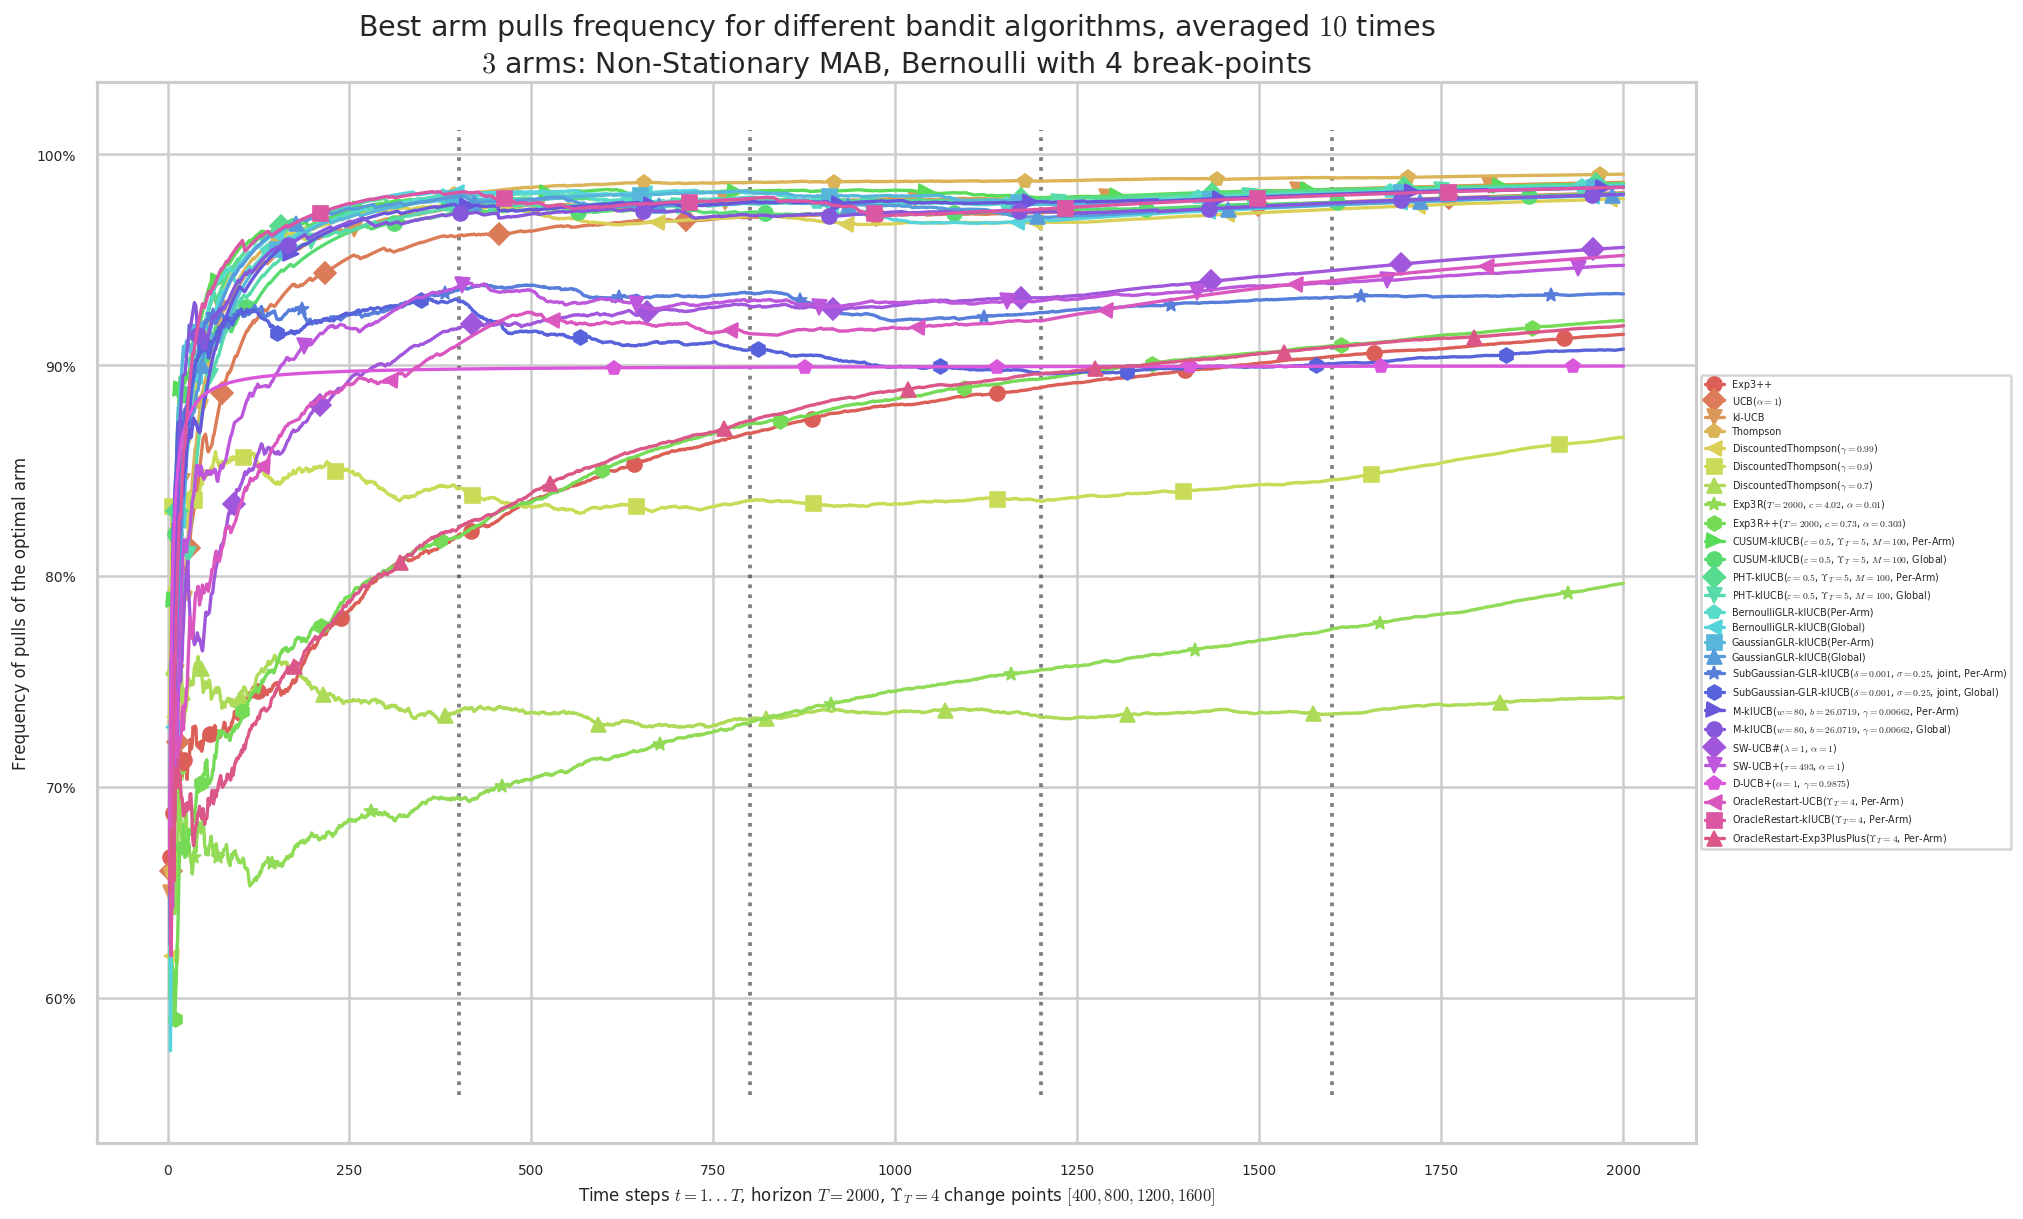


Plotting an histogram of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.png'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.png' created of size '149474b', at 'Wed Dec 19 17:10:07 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.pdf'...
       Saved! 'plots/SP__K3_T2000_N10__27_algos/main__LastRegrets__env2-2.pdf' created of size '55688b', at 'Wed Dec 19 17:10:07 2018' ...


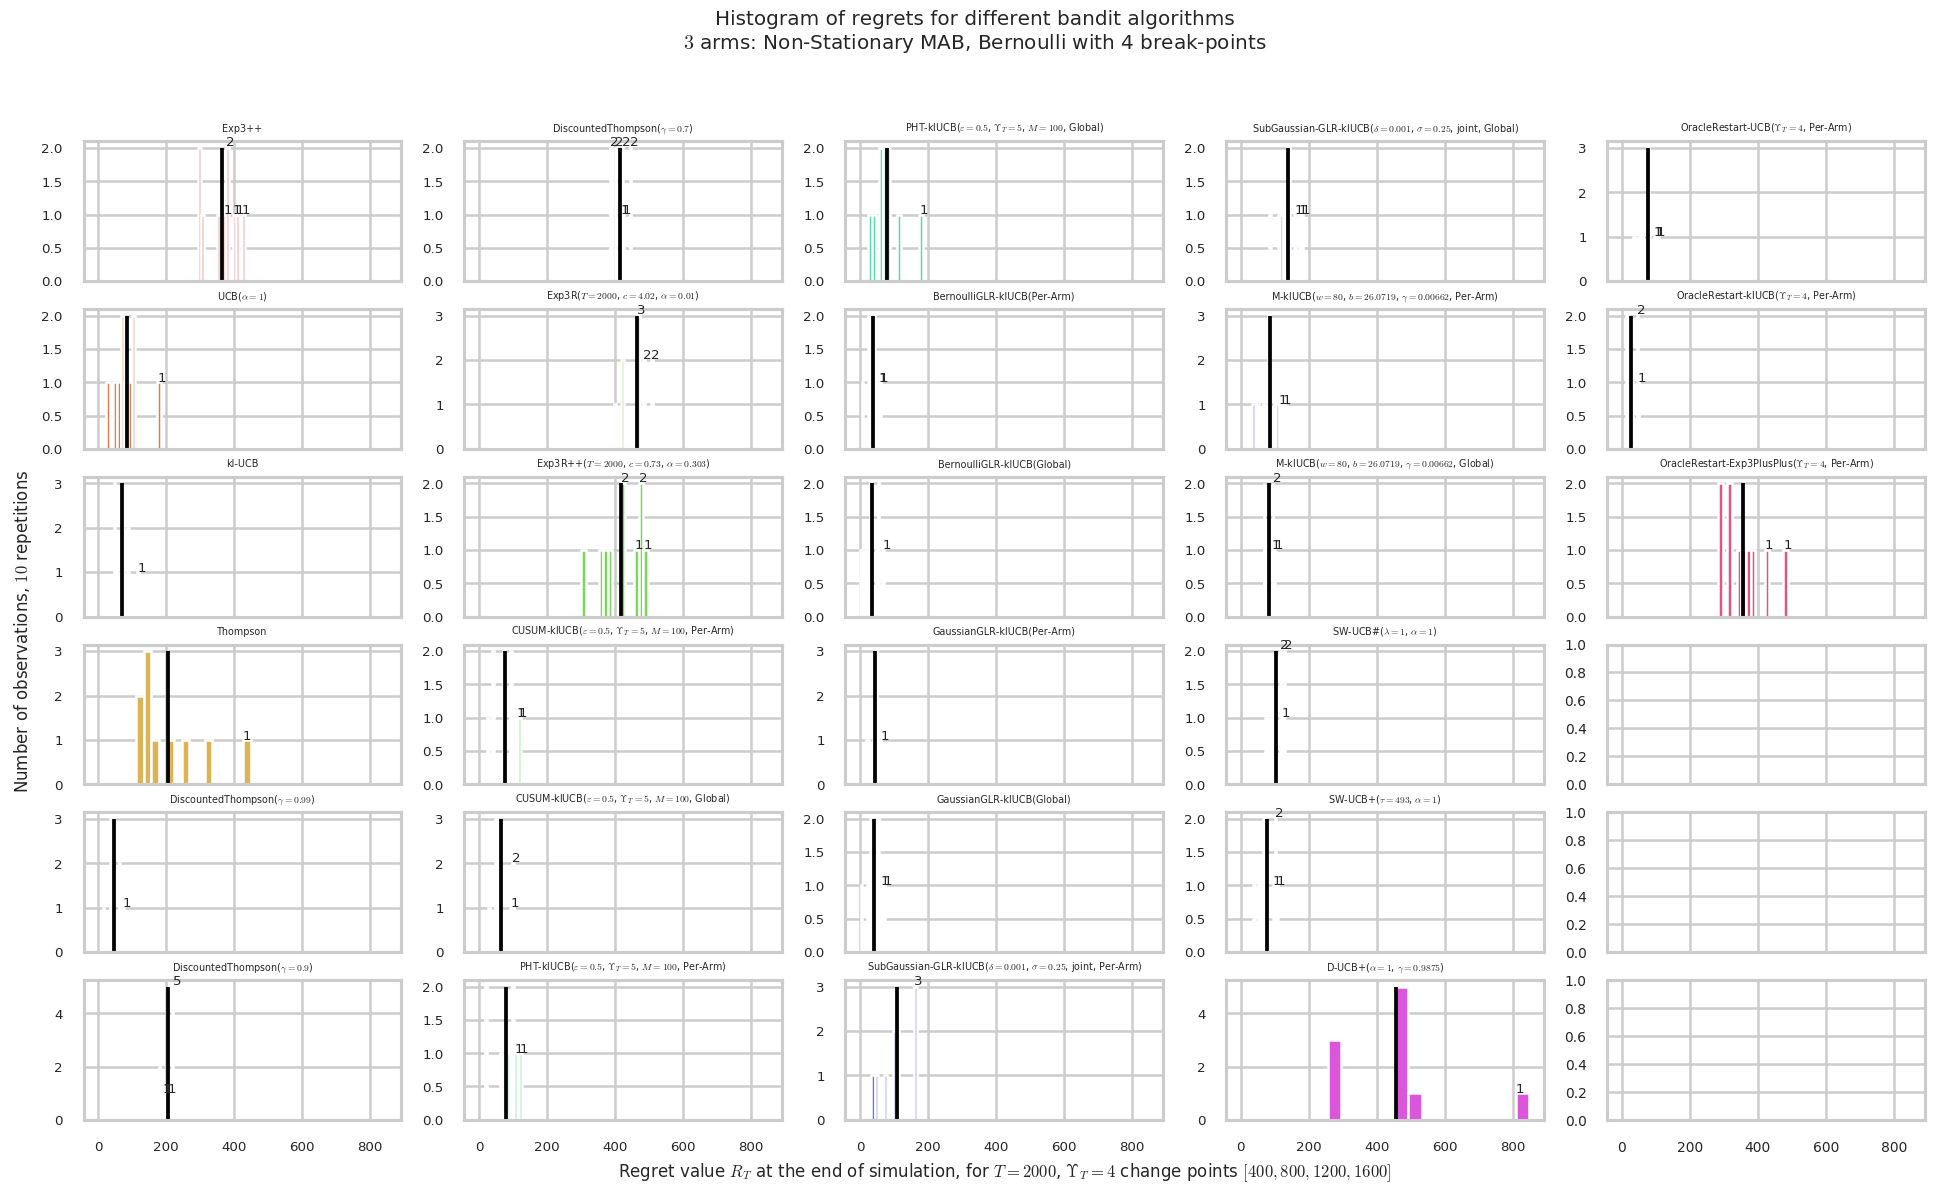

In [43]:
_ = plotAll(evaluation, envId, mainfig=mainfig)

---
> That's it for this demo!